In [57]:
from IPython.display import display, Image, clear_output

# Comprehensive Lipidome Automation Workflow (CLAW)

Welcome to CLAW, a tool designed to facilitate and optimize the processing of lipidomic MRM data. This Jupyter notebook encapsulates a suite of tools that streamline the various stages of lipidomics data analysis.

Our toolset enables users to efficiently process MRM data files in the mzML format. Upload a file and CLAW will parse the data into a structured Pandas dataframe. This dataframe includes critical information like sample_ID, MRM transition, and signal intensity. Furthermore, our tool aligns each MRM transition with a default or custom lipid_database for accurate and swift annotation.

Moreover, CLAW is equipped with an OzESI option, a tool to elucidate the double bond location in lipid isomers. This feature allows users to input OzESI data and pinpoint the precise location of double bonds in isomeric lipids. Users have the flexibility to select which double bond locations they want to analyze. Following this, CLAW autonomously predicts potential m/z values and cross-references these predictions with sample data, ensuring a comprehensive and meticulous analysis.

With automation at its core, CLAW eliminates the need for manual data processing, significantly reducing time expenditure. It is a robust and invaluable tool for handling large volumes of lipid MRM data, accelerating scientific discovery in the field of lipidomics.

In [58]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json

#Import all the necessary CLAW libraries
import create_directory
import CLAW

import warnings

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Directory and File Management
For structured data management and efficient workflow, the system first ensures the presence of an output directory. If such a directory already exists you can skip this step.

In [59]:
# # Create the output directory. If it already exists you can skip this step.
# create_directory.create_project_folder()


The name of the project is defined next. This is important as the created directory will bear this name, allowing users to manage and identify their data with ease.

After the mzML files are uploaded to the designated mzML folder, the next block of code segregates these files based on their characteristics. More specifically, it filters the files and transfers them to respective folders named 'o3on' and 'o2only'.

In [60]:
name_of_project = 'canola'
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

One or both of the destination directories 'Projects/canola/o3on' and 'Projects/canola/o2only' do not exist.


## Pre-Parsing Setup
The following block of code takes the preset variable values and uses them to parse the mzML files. The parsed data, including the sample ID, MRM transitions, and intensities, is stored in a pandas dataframe for easy manipulation and analysis.

The function CLAW.parsing_mzml_to_df takes several arguments. data_base_name_location is the location of the lipid database that contains information on lipid classes, fatty acid chains, and their corresponding MRM transitions. Project_Folder_data is the location of the mzML files for the samples to be analyzed. tolerance defines the acceptable range of deviation for the MRM transitions when matching them with the lipid database. The argument remove_std is a boolean that, when True, indicates to remove the MRM transitions that correspond to standards (internal or external) present in the samples.

The function outputs a pandas dataframe (df) where each row corresponds to an MRM transition detected in a sample, and columns include the sample ID, MRM transition, and intensity of the transition, among other values.

In [61]:
# Set default values
data_base_name_location = 'lipid_database/Lipid_Database.xlsx'
Project = './Projects/'
Project_Name = 'canola'
Project_Folder_data = Project + Project_Name + '/mzml/'
Project_results = Project + Project_Name + '/results/'
file_name_to_save = 'canola_OzON'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/Lipid_Database.xlsx
Project: ./Projects/
Project_Name: canola
Project_Folder_data: ./Projects/canola/mzml/
Project_results: ./Projects/canola/results/
file_name_to_save: canola_OzON
tolerance: 0.3
remove_std: True
save_data: True


Define the master dataframes where the data will be stored during the parsing step.

In [62]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

## CLAW.full_parse()
In this code, the `CLAW.full_parse()` function is used to analyze the MRM data. It takes several parameters like the location of the lipid database, paths to the data and results folders, the name of the result files, and the tolerance for MRM transitions matching. The function returns two dataframes: `df_matched` that contains information about each detected lipid species and their corresponding MRM transitions, and `OzESI_time_df` which captures data related to OzESI-MS scans, including potential double bond locations of lipids. If `remove_std` is `True`, it removes MRM transitions related to standards from the dataframe, and if `save_data` is `True`, the dataframe is saved as a .csv file in the specified results folder.

In [63]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/canola/mzml/CrudeCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/DegummedCanola_O3on_150gN3_02082023.mzML

Finished parsing mzML file: ./Projects/canola/mzml/RBDCanola_O3on_150gN3_02082023.mzML

Finished parsing all mzML files



In [64]:
df_MRM.head(None)

,Class,Intensity,Lipid,Parent_Ion,Product_Ion,Sample_ID,Transition
0,NaN,5.451378e+05,NaN,760.6,571.6,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
1,NaN,6.208219e+05,NaN,762.6,573.6,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6
2,NaN,9.441859e+05,NaN,764.6,575.6,CrudeCanola_O3on_150gN3_02082023,764.6 -> 575.6
3,NaN,1.137434e+06,NaN,766.7,577.6,CrudeCanola_O3on_150gN3_02082023,766.7 -> 577.6
4,NaN,5.900676e+05,NaN,782.6,593.6,CrudeCanola_O3on_150gN3_02082023,782.6 -> 593.6
...,...,...,...,...,...,...,...
310,TAG,4.897507e+05,[TG(54:6)]_FA18:1,896.8,597.6,RBDCanola_O3on_150gN3_02082023,896.8 -> 597.6
311,TAG,1.179904e+06,[TG(54:5)]_FA18:1,898.8,599.6,RBDCanola_O3on_150gN3_02082023,898.8 -> 599.6
312,TAG,1.654774e+06,"[TG(55:11),TG(54:4)]_FA18:1",900.8,601.6,RBDCanola_O3on_150gN3_02082023,900.8 -> 601.6
313,TAG,5.234119e+06,"[TG(55:10),TG(54:3)]_FA18:1",902.8,603.6,RBDCanola_O3on_150gN3_02082023,902.8 -> 603.6


In [65]:
df_OzESI.head(None)
# df_OzESI.to_csv('FF_OzOFF_full.csv')
# df_OzESI.to_excel('FaceFatsOzdf.xlsx')

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,760.6,571.6,0.015933,190.400009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
1,NaN,760.6,571.6,0.032233,147.420013,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
2,NaN,760.6,571.6,0.048550,153.620010,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
3,NaN,760.6,571.6,0.064850,200.080017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
4,NaN,760.6,571.6,0.081167,206.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
...,...,...,...,...,...,...,...
676066,NaN,904.8,605.6,34.931700,148.500015,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
676067,NaN,904.8,605.6,34.948000,131.800003,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
676068,NaN,904.8,605.6,34.964317,151.960007,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
676069,NaN,904.8,605.6,34.980617,137.700012,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6


The `read_mrm_list()` function is first invoked to read the MRM database from the specified file location and return it as a pandas DataFrame `mrm_database`. Subsequently, the `match_lipids_parser()` function is called to match the detected lipids from the `OzESI_time_df` DataFrame, obtained from the OzESI-MS scans, with the known lipids in the `mrm_database` based on the MRM transitions within the specified `tolerance`. The result is saved in the `df_oz_matched` DataFrame, which now contains matched lipid species from the OzESI-MS data.

In [66]:
d1 = df_OzESI.iloc[:,1:9]

import pandas as pd

# Assuming d1 is your DataFrame

# Define the retention time range as a tuple (lower_bound, upper_bound)
retention_time_range = (9.5, 21.5)  # Replace with your specific range values

# Filter the DataFrame to keep only rows where Retention_Time is within the specified range
d1a = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# # Now, filtered_d1 contains only the rows from d1 where Retention_Time is within the specified range
# filtered_d1.to_csv('filtered_d1_FF_OzON_Liver.csv')
d1a

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
582,760.6,571.6,9.507133,184.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
583,760.6,571.6,9.523450,207.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
584,760.6,571.6,9.539750,160.700012,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
585,760.6,571.6,9.556067,102.660004,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
586,760.6,571.6,9.572367,76.720009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6
...,...,...,...,...,...,...
675238,904.8,605.6,21.428717,2535.120117,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
675239,904.8,605.6,21.445033,2666.960205,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
675240,904.8,605.6,21.461333,2615.500244,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6
675241,904.8,605.6,21.477650,2479.740234,RBDCanola_O3on_150gN3_02082023,904.8 -> 605.6


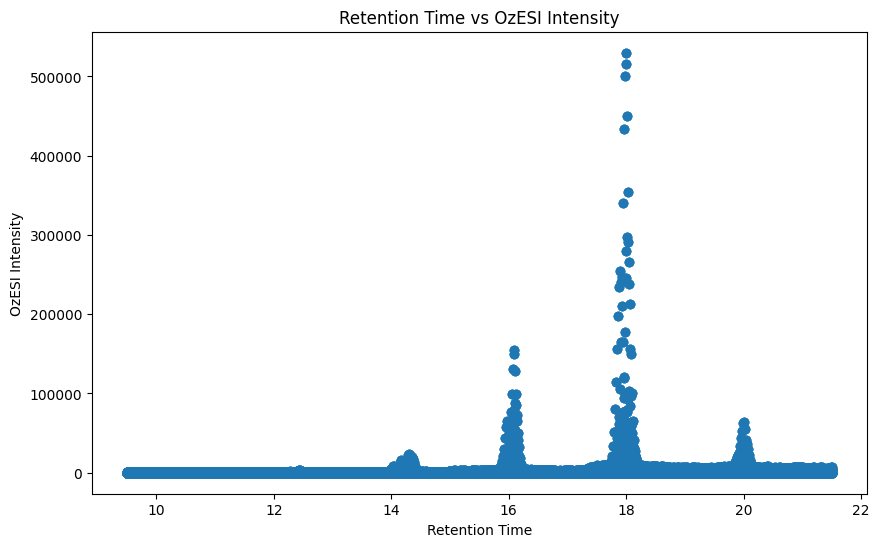

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [68]:
# Assuming d1 is your DataFrame and contains 'Retention_Time', 'Parent_Ion', 'Product_Ion', and 'OzESI_Intensity' columns

# Define the retention time range
retention_time_range = (12, 16)

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d1[(d1['Retention_Time'] >= retention_time_range[0]) & (d1['Retention_Time'] <= retention_time_range[1])]

# Filter to get only the rows with specific transition and OzESI_Intensity > 500
specific_transition = n7_values[(n7_values['Parent_Ion'] == 790.7) & (n7_values['Product_Ion'] == 573.6) & (n7_values['OzESI_Intensity'] > 300)]

# Display the filtered DataFrame
specific_transition.tail(50)


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
550302,790.7,573.6,14.084583,397.560028,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550303,790.7,573.6,14.100900,430.180023,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550304,790.7,573.6,14.117200,512.180054,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550305,790.7,573.6,14.133517,540.140015,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550306,790.7,573.6,14.149817,557.340027,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550307,790.7,573.6,14.166133,626.900024,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550308,790.7,573.6,14.182433,616.880066,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550309,790.7,573.6,14.198750,640.020020,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550310,790.7,573.6,14.215050,568.680054,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6
550311,790.7,573.6,14.231367,625.380066,DegummedCanola_O3on_150gN3_02082023,790.7 -> 573.6


Correct RTs add DB position based on correct RT

In [69]:
Correct_RT_directory = 'tools/RT/'
#MRM CORRECT RT DF
df_MRM_RT_correct = pd.read_csv(Correct_RT_directory + 'CLAW_Canola_CorrectRT_v3_manual.csv') #correct MRM RT
# df_MRM_RT_correct['Retention_Time'] = df_MRM_RT_correct['Average_Retention_Time']

# List of new column names based on db_pos_list
db_column_names = []
db_pos_list = [7, 9, 10, 12]


df_DB_aldehyde = pd.DataFrame(columns=['DB_Position','Aldehyde_Ion'])

# Loop through the range of DB_Position values to calculate the corresponding Aldehyde_Ion values
for position in range(3, 21):
    df_DB_aldehyde.loc[position, 'DB_Position'] = position
    df_DB_aldehyde.loc[position, 'Aldehyde_Ion'] = 26 + (14 * (position-3))

for number in db_pos_list:
    db_column_names.append(f'n-{number}')

# Create an empty DataFrame with initial columns
df_db_pos = pd.DataFrame(columns=['Lipid', 'Retention_Time', 'Parent_Ion','Product_Ion'])

# Append new column names to the DataFrame
for column_name in db_column_names:
    df_db_pos[column_name] = pd.NA  # Initialize the new columns with NA

# df_DB_aldehyde #aldehyde ion values


#append df_MRM_RT_correct to df_db_pos
df_db_pos = df_db_pos.append(df_MRM_RT_correct, ignore_index=True)


# Loop through the specified db_pos_list
for ozesi_position in db_pos_list:
    # Retrieve the corresponding Aldehyde_Ion value for the current DB_Position
    aldehyde_ion = df_DB_aldehyde.loc[df_DB_aldehyde["DB_Position"] == ozesi_position, "Aldehyde_Ion"].values[0]

    # Calculate and store the n-i value for the current OzESI position
    df_db_pos["n-{}".format(ozesi_position)] = df_db_pos["Parent_Ion"] - aldehyde_ion


# df_db_pos.to_csv('df_db_pos.csv')
# df_MRM_RT_correct  #correct MRM RT
#drop Average_Retention_Time column from df db pos
df_db_pos  #empty df with n-7, n-9, n-10, n-12 columns





,Lipid,Retention_Time,Parent_Ion,Product_Ion,n-7,n-9,n-10,n-12
0,[TG(52:4)]_FA18:1,14.32,872.8,573.6,790.8,762.8,748.8,720.8
1,[TG(52:5)]_FA18:1,12.59,870.8,571.6,788.8,760.8,746.8,718.8
2,"[TG(53:10),TG(52:3)]_FA18:1",16.12,874.8,575.6,792.8,764.8,750.8,722.8
3,"[TG(53:9),TG(52:2)]_FA18:1",18.04,876.8,577.6,794.8,766.8,752.8,724.8
4,[TG(54:5)]_FA18:1,14.30,898.8,599.6,816.8,788.8,774.8,746.8
5,[TG(54:6)]_FA18:1,12.43,896.8,597.6,814.8,786.8,772.8,744.8
6,"[TG(54:7),TG(53:0)]_FA18:1",10.73,894.8,595.6,812.8,784.8,770.8,742.8
7,"[TG(55:10),TG(54:3)]_FA18:1",17.99,902.8,603.6,820.8,792.8,778.8,750.8
8,"[TG(55:11),TG(54:4)]_FA18:1",16.08,900.8,601.6,818.8,790.8,776.8,748.8
9,"[TG(55:9),TG(54:2)]_FA18:1",20.00,904.8,605.6,822.8,794.8,780.8,752.8


Filter through filtered_d1 based on matched OzOFF lipids df_db_pos for n-7 and n-9 values

In [70]:
# Assuming df_db_pos and filtered_d1 are your DataFrames

tolerance = 0.3
retention_time_tolerance = 1.0  # Adjust this value as needed

# Re-initializing an empty DataFrame for filtered_d2
d2 = pd.DataFrame()

# Iterating through df_db_pos
for index, row in df_db_pos.iterrows():
    ground_truth_retention_time = row['Retention_Time']  # Ground truth retention time
    product_ion = row['Product_Ion']
    parent_ion_n7 = row['n-7']
    parent_ion_n9 = row['n-9']
    parent_ion_n10 = row['n-10']
    parent_ion_n12 = row['n-12']
    lipid_name = row['Lipid']  # Extracting Lipid name from df_db_pos

    # Defining the retention time window based on ground truth
    lower_bound_time = ground_truth_retention_time - retention_time_tolerance
    upper_bound_time = ground_truth_retention_time + retention_time_tolerance

    # Defining the tolerance for Parent and Product ions
    lower_bound_ion = product_ion - tolerance
    upper_bound_ion = product_ion + tolerance

    # Filtering filtered_d1 within the specified window and matching ions with tolerance
    matches = d1a[(d1a['Retention_Time'] >= lower_bound_time) & 
                        (d1a['Retention_Time'] <= upper_bound_time) &
                        (d1a['OzESI_Intensity'] >= 5) &
                        (d1a['Product_Ion'] >= lower_bound_ion) &
                        (d1a['Product_Ion'] <= upper_bound_ion)]

    # Adding 'db' and 'Lipid' columns based on the tolerance matching
    matches['db'] = ''
    matches['Lipid'] = lipid_name  # Adding the Lipid name to all matches
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n7 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n7 + tolerance), 'db'] = 'n-7'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n9 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n9 + tolerance), 'db'] = 'n-9'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n10 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n10 + tolerance), 'db'] = 'n-10'
    matches.loc[(matches['Parent_Ion'] >= parent_ion_n12 - tolerance) & 
                (matches['Parent_Ion'] <= parent_ion_n12 + tolerance), 'db'] = 'n-12'

    # Append the matching rows to filtered_d2
    d2 = d2.append(matches)

# Resetting the index of the new DataFrame
d2 = d2.reset_index(drop=True)

# Display the first few rows of the new DataFrame
d2


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
0,762.6,573.6,13.322733,184.040009,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
1,762.6,573.6,13.339033,188.620010,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
2,762.6,573.6,13.355350,177.520020,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
3,762.6,573.6,13.371650,203.960022,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
4,762.6,573.6,13.387967,162.880005,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
...,...,...,...,...,...,...,...,...
33682,870.8,571.6,21.432950,174.080017,RBDCanola_O3on_150gN3_02082023,870.8 -> 571.6,,NaN
33683,870.8,571.6,21.449250,143.320007,RBDCanola_O3on_150gN3_02082023,870.8 -> 571.6,,NaN
33684,870.8,571.6,21.465567,143.560013,RBDCanola_O3on_150gN3_02082023,870.8 -> 571.6,,NaN
33685,870.8,571.6,21.481867,127.220009,RBDCanola_O3on_150gN3_02082023,870.8 -> 571.6,,NaN


Check specific transition RT for validate RT

In [71]:
# Assuming filtered_d2 is already created and contains the 'db' column

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d2[d2['db'] == 'n-7']

# Filter to get only the rows with specific transition: Parent_Ion 788.7 to Product_Ion 599.5
specific_transition = n7_values[(n7_values['Parent_Ion'] == 790.7) & (n7_values['Product_Ion'] == 573.6)]

specific_transition


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
123,790.7,573.6,13.334400,85.600006,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
124,790.7,573.6,13.350700,96.760010,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
125,790.7,573.6,13.367017,128.720016,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
126,790.7,573.6,13.383317,158.860016,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
127,790.7,573.6,13.399633,187.420013,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
...,...,...,...,...,...,...,...,...
3184,790.7,573.6,15.242433,198.260010,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
3185,790.7,573.6,15.258733,232.260010,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
3186,790.7,573.6,15.275050,264.300018,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1
3187,790.7,573.6,15.291350,220.440018,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1


Filter for only db values

In [72]:
# Creating filtered_d3 from filtered_d2
d3 = d2.copy()

# Dropping rows where 'db' column is blank
d3 = d3[d3['db'] != '']

# Alternatively, you can use:
# filtered_d3 = filtered_d3.dropna(subset=['db'])

d3


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid
0,762.6,573.6,13.322733,184.040009,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
1,762.6,573.6,13.339033,188.620010,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
2,762.6,573.6,13.355350,177.520020,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
3,762.6,573.6,13.371650,203.960022,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
4,762.6,573.6,13.387967,162.880005,CrudeCanola_O3on_150gN3_02082023,762.6 -> 573.6,n-9,[TG(52:4)]_FA18:1
...,...,...,...,...,...,...,...,...
32993,822.7,605.6,20.928767,731.720032,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1"
32994,822.7,605.6,20.945083,419.760040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1"
32995,822.7,605.6,20.961383,348.300018,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1"
32996,822.7,605.6,20.977700,437.960022,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1"


CLUSTER GMM

In [73]:
# import pandas as pd
# from sklearn.mixture import GaussianMixture

# # Assuming filtered_d2 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 500)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for GMM
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply GMM clustering to this specific ion pair group
#     # Note: The number of components (n_components) and the covariance type are parameters
#     # that might need tuning based on your specific dataset
#     gmm = GaussianMixture(n_components=1, covariance_type='full').fit(retention_times)

#     # Get the cluster labels
#     labels = gmm.predict(retention_times)

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


# GMM

In [74]:
import pandas as pd
from sklearn.mixture import GaussianMixture

# Assuming filtered_d2 is your DataFrame
d4 = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# Iterate over each group of Parent_Ion and Product_Ion
for (parent_ion, product_ion, db), group in d3.groupby(['Parent_Ion', 'Product_Ion','db']):
    # Calculate 1% below the maximum 'OzESI_Intensity'
    max_intensity = group['OzESI_Intensity'].max()
    cutoff_intensity = max_intensity * 0.00005

    # Apply the filters
    filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 0)]

    # Check if the filtered group is empty or has less than 2 samples
    if filtered_group.empty or len(filtered_group) < 2:
        continue

    # Reshape the 'Retention_Time' data for GMM
    retention_times = filtered_group[['Retention_Time']].values

    # Apply GMM clustering to this specific ion pair group
    # Note: Adjust the number of components (n_components) as needed
    gmm = GaussianMixture(n_components=3, covariance_type='full').fit(retention_times)

    # Get the cluster labels
    labels = gmm.predict(retention_times)

    # Add the cluster labels to the filtered group
    filtered_group['Cluster_Label'] = labels

    # Append the clustered group to the results DataFrame
    d4 = pd.concat([d4, filtered_group])

# The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
d4


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label
3312,760.6,571.6,11.594550,172.220016,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1
3313,760.6,571.6,11.610850,105.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1
3314,760.6,571.6,11.627167,130.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1
3315,760.6,571.6,11.643467,147.580017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1
3316,760.6,571.6,11.659783,195.600021,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1
...,...,...,...,...,...,...,...,...,...
32993,822.7,605.6,20.928767,731.720032,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2
32994,822.7,605.6,20.945083,419.760040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2
32995,822.7,605.6,20.961383,348.300018,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2
32996,822.7,605.6,20.977700,437.960022,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2


In [75]:
# Assuming d1 is your DataFrame and contains 'Retention_Time', 'Parent_Ion', 'Product_Ion', and 'OzESI_Intensity' columns

# Define the retention time range
retention_time_range = (13, 15)

# Filter to get only the rows where 'db' is 'n-7'
n7_values = d4[(d4['Retention_Time'] >= retention_time_range[0]) & (d4['Retention_Time'] <= retention_time_range[1])]

# Filter to get only the rows with specific transition and OzESI_Intensity > 500
specific_transition = n7_values[(n7_values['Parent_Ion'] == 790.7) & (n7_values['Product_Ion'] == 573.6) & (n7_values['OzESI_Intensity'] > 200)]

# Display the filtered DataFrame
specific_transition


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label
128,790.7,573.6,13.415933,207.760010,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,1
129,790.7,573.6,13.432250,212.840012,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,1
130,790.7,573.6,13.448550,228.640015,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,1
136,790.7,573.6,13.546400,237.740021,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,1
137,790.7,573.6,13.562717,246.840012,CrudeCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,1
...,...,...,...,...,...,...,...,...,...
3161,790.7,573.6,14.867350,296.100006,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,2
3162,790.7,573.6,14.883650,227.480011,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,2
3167,790.7,573.6,14.965200,208.480011,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,2
3168,790.7,573.6,14.981500,226.840012,RBDCanola_O3on_150gN3_02082023,790.7 -> 573.6,n-7,[TG(52:4)]_FA18:1,2


Cluster by RT ALL SAMPLES

In [76]:
# import pandas as pd
# from sklearn.cluster import DBSCAN

# # Assuming filtered_d1 is your DataFrame
# clustered_data = pd.DataFrame()  # Initialize an empty DataFrame to store clustered results

# # Iterate over each group of Parent_Ion and Product_Ion
# for (parent_ion, product_ion), group in filtered_d2.groupby(['Parent_Ion', 'Product_Ion']):
#     # Calculate 1% below the maximum 'OzESI_Intensity'
#     max_intensity = group['OzESI_Intensity'].max()
#     cutoff_intensity = max_intensity * 0.01

#     # Apply the filters
#     filtered_group = group[(group['OzESI_Intensity'] >= cutoff_intensity) & (group['OzESI_Intensity'] > 400)]

#     # Check if the filtered group is empty, skip to the next iteration if so
#     if filtered_group.empty:
#         continue

#     # Reshape the 'Retention_Time' data for DBSCAN
#     retention_times = filtered_group[['Retention_Time']].values

#     # Apply DBSCAN clustering to this specific ion pair group
#     dbscan = DBSCAN(eps=0.09, min_samples=20).fit(retention_times)

#     # Get the cluster labels
#     labels = dbscan.labels_

#     # Add the cluster labels to the filtered group
#     filtered_group['Cluster_Label'] = labels

#     # Append the clustered group to the results DataFrame
#     clustered_data = pd.concat([clustered_data, filtered_group])

# # The resulting DataFrame, clustered_data, now contains separately clustered data for each ion pair
# clustered_data


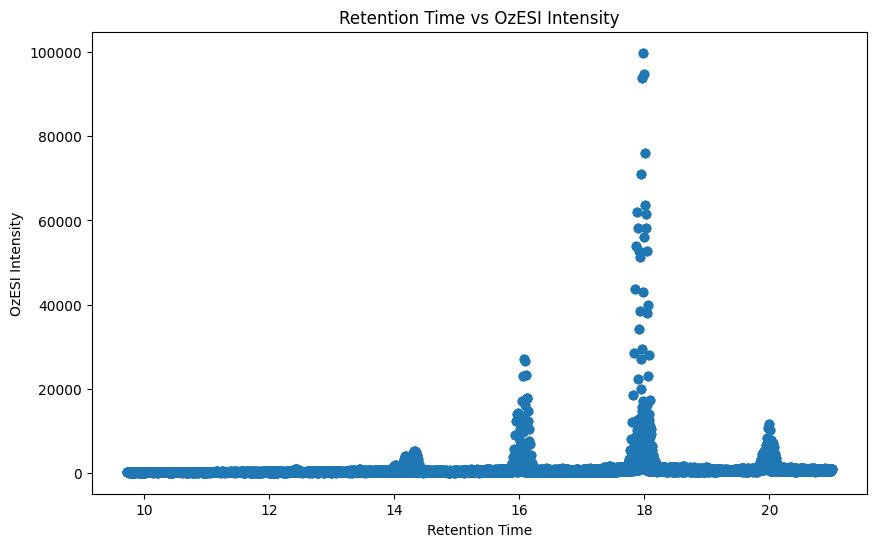

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming clustered_data is your DataFrame with the necessary data

# Plotting the Intensity vs Retention Time
plt.figure(figsize=(10, 6))
plt.scatter(d4['Retention_Time'], d4['OzESI_Intensity'])

# Adding labels and title to the plot
plt.xlabel('Retention Time')
plt.ylabel('OzESI Intensity')
plt.title('Retention Time vs OzESI Intensity')

# Displaying the plot
plt.show()


In [78]:
# Function to determine the value for the Purity column
def determine_purity(sample_id):
    if 'Crude' in sample_id:
        return 'Crude'
    elif 'Degummed' in sample_id:
        return 'Degummed'
    elif 'RBD' in sample_id:
        return 'RBD'
    else:
        return None  # or some other default value if needed

# Apply the function to the Sample_ID column to create the Purity column
d4['Purity'] = d4['Sample_ID'].apply(determine_purity)
d4

grouped_cluster_data = d4.groupby(['Parent_Ion', 'Product_Ion','db','Purity'])
#add group number to each to a new column called Group
d4['Group'] = grouped_cluster_data.ngroup()
d4
d5= d4.copy()  # Create a copy of the clustered_data DataFrame
#print transition 870.8 -> 788.8
d5

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group
3312,760.6,571.6,11.594550,172.220016,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0
3313,760.6,571.6,11.610850,105.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0
3314,760.6,571.6,11.627167,130.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0
3315,760.6,571.6,11.643467,147.580017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0
3316,760.6,571.6,11.659783,195.600021,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0
...,...,...,...,...,...,...,...,...,...,...,...
32993,822.7,605.6,20.928767,731.720032,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59
32994,822.7,605.6,20.945083,419.760040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59
32995,822.7,605.6,20.961383,348.300018,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59
32996,822.7,605.6,20.977700,437.960022,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59


# Area and RT range AREA AREA AREA AREA AREA AREA AREA AREA 

In [79]:


# Calculate the minimum and maximum Retention_Time for each group with Cluster_Label included
min_rt = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion', 'db', 'Cluster_Label'])['Retention_Time'].transform('min')
max_rt = d5.groupby(['Sample_ID', 'Parent_Ion', 'Product_Ion', 'db', 'Cluster_Label'])['Retention_Time'].transform('max')

# # Summing up OzESI_Intensity for each combination of Sample_ID, Parent_Ion, Product_Ion, db, and Cluster_Label
# Calculate the absolute difference and add it to the dataframe as 'Area_RT'
d5['Area_RT'] = abs(max_rt - min_rt)

# Display the updated dataframe
d5

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group,Area_RT
3312,760.6,571.6,11.594550,172.220016,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317
3313,760.6,571.6,11.610850,105.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317
3314,760.6,571.6,11.627167,130.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317
3315,760.6,571.6,11.643467,147.580017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317
3316,760.6,571.6,11.659783,195.600021,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317
...,...,...,...,...,...,...,...,...,...,...,...,...
32993,822.7,605.6,20.928767,731.720032,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59,0.619700
32994,822.7,605.6,20.945083,419.760040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59,0.619700
32995,822.7,605.6,20.961383,348.300018,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59,0.619700
32996,822.7,605.6,20.977700,437.960022,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",2,RBD,59,0.619700


# Trim Peaks

In [2061]:
def Peak_Trim(d5a, trim_specs):
    """
    Trim data points based on Retention_Time from the left and/or right of specified group-cluster pairs in a DataFrame.

    Parameters:
    - d5a: DataFrame containing the data.
    - trim_specs: List of dictionaries, each containing 'group', 'cluster_label', 
                  'trim_left', and 'trim_right' keys. 'trim_left' and 'trim_right' are the amounts 
                  to be trimmed from the left and right in terms of Retention_Time.

    Returns:
    - DataFrame with the specified data points trimmed.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    trimmed_df = d5a.copy()

    for spec in trim_specs:
        group = spec['group']
        cluster_label = spec['cluster_label']
        trim_left = spec.get('trim_left', None)
        trim_right = spec.get('trim_right', None)

        # Filter for the specific Group and Cluster_Label
        filtered_data = trimmed_df[(trimmed_df['Group'] == group) & (trimmed_df['Cluster_Label'] == cluster_label)]

        # Ensure the filtered DataFrame is sorted by Retention_Time
        sorted_data = filtered_data.sort_values(by='Retention_Time')

        # Trim based on Retention_Time
        if trim_left is not None:
            sorted_data = sorted_data[sorted_data['Retention_Time'] > sorted_data['Retention_Time'].min() + trim_left]
        if trim_right is not None:
            sorted_data = sorted_data[sorted_data['Retention_Time'] < sorted_data['Retention_Time'].max() - trim_right]

        # Drop the original rows for this group-cluster pair
        trimmed_df = trimmed_df.drop(trimmed_df[(trimmed_df['Group'] == group) & (trimmed_df['Cluster_Label'] == cluster_label)].index)

        # Append the filtered (trimmed) data back into the DataFrame
        trimmed_df = trimmed_df.append(sorted_data, ignore_index=True)

    return trimmed_df

# Example usage
d5_trimmed = d5.copy()  # Create a copy of the DataFrame
trim_specs = [
    {'group': 59, 'cluster_label': 0, 'trim_left': 0.21, 'trim_right': 0.15},
    # {'group': 41, 'cluster_label': 0, 'trim_left': 0.13, 'trim_right': 0.12},
    # Add more specifications as needed
]
d5_trimmed = Peak_Trim(d5_trimmed, trim_specs)

# Print details for a specific group-cluster pair to verify
group = 59
cluster_label = 0
print(f'Group {group}, Cluster Label {cluster_label} - Before and After Trim:')
print('Before Trim:')
print('Min Retention Time:', d5[(d5['Group'] == group) & (d5['Cluster_Label'] == cluster_label)]['Retention_Time'].min())
print('Max Retention Time:', d5[(d5['Group'] == group) & (d5['Cluster_Label'] == cluster_label)]['Retention_Time'].max())
print('After Trim:')
print('Min Retention Time:', d5_trimmed[(d5_trimmed['Group'] == group) & (d5_trimmed['Cluster_Label'] == cluster_label)]['Retention_Time'].min())
print('Max Retention Time:', d5_trimmed[(d5_trimmed['Group'] == group) & (d5_trimmed['Cluster_Label'] == cluster_label)]['Retention_Time'].max())


Group 59, Cluster Label 0 - Before and After Trim:
Before Trim:
Min Retention Time: 19.67305
Max Retention Time: 20.357983333333333
After Trim:
Min Retention Time: 19.88505
Max Retention Time: 20.1949


# Calculate Area SCIPY INTEGRATE Trapz 

In [2062]:

### Area using TRAPZ
import pandas as pd
from scipy.integrate import trapz

# Copy the original DataFrame
d5a = d5_trimmed.copy()

# Create an empty DataFrame for storing the calculated areas
area_results = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Area'])

# Group by 'Group' and 'Cluster_Label'
grouped_data = d5a.groupby(['Group', 'Cluster_Label'])

# Iterate over each group and calculate the area
for (group, cluster_label), group_data in grouped_data:
    # Sort the group data by 'Retention_Time'
    sorted_group_data = group_data.sort_values(by='Retention_Time')

    # Extract 'Retention_Time' and 'OzESI_Intensity'
    retention_time = sorted_group_data['Retention_Time']
    intensity = sorted_group_data['OzESI_Intensity']

    # Calculate the area using the trapezoidal rule
    area = trapz(intensity, retention_time)

    # Append the results to the area_results DataFrame
    area_results = area_results.append({
        'Group': group, 
        'Cluster_Label': cluster_label, 
        'Area': area
    }, ignore_index=True)

# Merge the calculated areas back into the original DataFrame
d5a = pd.merge(d5a, area_results, on=['Group', 'Cluster_Label'])

# Round the 'Area' to 0 decimal places
d5a['Area'] = d5a['Area'].round(0)

# ### RHOMB
# # d5a
# import pandas as pd
# from scipy.integrate import romb
# from scipy.interpolate import interp1d
# import numpy as np

# # Copy the original DataFrame
# d5a = d5.copy()

# # Create an empty DataFrame for storing the calculated areas
# area_results = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Area'])

# # Group by 'Group' and 'Cluster_Label'
# grouped_data = d5a.groupby(['Group', 'Cluster_Label'])

# # Iterate over each group and calculate the area
# for (group, cluster_label), group_data in grouped_data:
#     # Sort the group data by 'Retention_Time' and remove duplicates
#     group_data = group_data.groupby('Retention_Time').agg({'OzESI_Intensity': 'mean'}).reset_index()

#     # Extract 'Retention_Time' and 'OzESI_Intensity'
#     retention_time = group_data['Retention_Time']
#     intensity = group_data['OzESI_Intensity']

#     # Interpolate the data points to a power-of-2 plus 1 number of points
#     n_points = 2**np.ceil(np.log2(len(retention_time) - 1)).astype(int) + 1
#     interp_func = interp1d(retention_time, intensity, kind='linear')
#     new_x = np.linspace(np.min(retention_time), np.max(retention_time), n_points)
#     new_y = interp_func(new_x)

#     # Calculate the area using the Romberg integration
#     area = romb(new_y, dx=new_x[1] - new_x[0])

#     # Append the results to the area_results DataFrame
#     area_results = area_results.append({
#         'Group': group, 
#         'Cluster_Label': cluster_label, 
#         'Area': area
#     }, ignore_index=True)

# # Merge the calculated areas back into the original DataFrame
# d5a = pd.merge(d5a, area_results, on=['Group', 'Cluster_Label'])

# # Round the 'Area' to 0 decimal places
# d5a['Area'] = d5a['Area'].round(0)

# d5a




In [2063]:
# def Peak_Trim(d5a, trim_specs):
#     """
#     Trim data points from the left and/or right of specified group-cluster pairs in a DataFrame.

#     Parameters:
#     - d5a: DataFrame containing the data.
#     - trim_specs: List of dictionaries, each containing 'group', 'cluster_label', 
#                   'n_left', and 'n_right' keys.
    
#     Returns:
#     - DataFrame with the specified data points trimmed.
#     """
#     trimmed_indices = []

#     for spec in trim_specs:
#         group = spec['group']
#         cluster_label = spec['cluster_label']
#         n_left = spec.get('n_left', None)
#         n_right = spec.get('n_right', None)

#         # Filter for the specific Group and Cluster_Label
#         filtered_data = d5a[(d5a['Group'] == group) & (d5a['Cluster_Label'] == cluster_label)]

#         # Ensure the filtered DataFrame is sorted by Retention_Time
#         filtered_data = filtered_data.sort_values(by='Retention_Time')

#         # Trim from the left and right as specified
#         if n_left is not None:
#             filtered_data = filtered_data.iloc[n_left:]
#         if n_right is not None:
#             filtered_data = filtered_data.iloc[:-n_right]

#         trimmed_indices.extend(filtered_data.index)

#     # Keep only the rows with indices in trimmed_indices
#     d5a = d5a.loc[trimmed_indices]

#     return d5a

# # Example usage:
# trim_specs = [
#     {'group': 39, 'cluster_label': 0, 'n_left': 5, 'n_right': 3},
#     {'group': 39, 'cluster_label': 1, 'n_left': 7, 'n_right': 2},
#     {'group': 40, 'cluster_label': 2, 'n_left': 4, 'n_right': 4},
#     {'group': 59, 'cluster_label': 0, 'n_left': 0, 'n_right': 7},
#     # Add more specifications as needed
# ]

# d5a_trimmed = Peak_Trim(d5a, trim_specs)


# Double check area calculation is correct

In [2064]:
# Assuming d5a is your original DataFrame and is already loaded in your environment

##Single Cluster and Group

# # Specify the Group and Cluster_Label you want to filter
# specific_group = 39  # Replace with the specific group number you want
# specific_cluster_label = 0  # Replace with the specific cluster label you want

# # Create a new DataFrame d5a_check from d5a for specific Group and Cluster_Label
# d5a_check = d5a[(d5a['Group'] == specific_group) & (d5a['Cluster_Label'] == specific_cluster_label)]

# # Display the first few rows of the new DataFrame d5a_check
# d5a_check


# ### All clusters in group
# # Assuming d5a is your original DataFrame and is already loaded in your environment

# # Specify the Group and Cluster_Label you want to filter
# specific_group = 39  # Replace with the specific group number you want

# # Create a new DataFrame d5a_check from d5a for specific Group and Cluster_Label
# d5a_check = d5a[(d5a['Group'] == specific_group)]

# # Display the first few rows of the new DataFrame d5a_check
# d5a_check


In [2065]:
# import numpy as np
# from scipy.integrate import simps

# def calculate_peak_area(y, peak_index, window_size=10):
#     """
#     Calculate the area of a peak using the Simpson's rule.
    
#     Args:
#     y (array-like): The intensity values.
#     peak_index (int): The index of the peak.
#     window_size (int): The number of points on either side of the peak to include in the area calculation.

#     Returns:
#     float: The estimated area under the peak.
#     """
#     start_index = max(peak_index - window_size, 0)
#     end_index = min(peak_index + window_size, len(y) - 1)

#     y_values = y[start_index:end_index + 1]

#     # Using Simpson's rule to approximate the area under the curve
#     area = simps(y_values)

#     return area

# # Assuming you've identified a peak at some index, for example:
# peak_index = peak_indices[0]  # Assuming the first detected peak

# # Calculate the area
# peak_area = calculate_peak_area(d5a_check['OzESI_Intensity'], peak_index, window_size=10)
# print("Area of the peak:", peak_area)


# Area Peak height and half width

In [2066]:
import pandas as pd

# Assuming 'd5' is your pandas DataFrame and contains the necessary columns
d5b = d5_trimmed.copy()  # Replace d5 with your actual DataFrame

# Define the peak_height_times_width_half_height function
def peak_height_times_width_half_height(group_data):
    """
    Function to calculate the area under a peak by multiplying peak height with width at half height.
    """
    # Find the peak height (maximum intensity)
    peak_height = group_data['OzESI_Intensity'].max()

    # Calculate half peak height
    half_peak_height = peak_height / 2

    # Filter data points greater than half peak height
    half_height_data = group_data[group_data['OzESI_Intensity'] >= half_peak_height]

    # Find the minimum and maximum retention times at half peak height
    min_time_at_half_height = half_height_data['Retention_Time'].min()
    max_time_at_half_height = half_height_data['Retention_Time'].max()

    # Calculate width at half height
    width_half_height = max_time_at_half_height - min_time_at_half_height

    # Area is peak height times width at half height
    area = peak_height * width_half_height

    return area

# Create an empty DataFrame for storing the calculated areas
area_results_hw = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Calculated_Area_HW'])

# Group by 'Group' and 'Cluster_Label'
grouped_data = d5b.groupby(['Group', 'Cluster_Label'])

# Calculate the area for each group using peak height times width at half height
for (group, cluster_label), group_data in grouped_data:
    area_hw = peak_height_times_width_half_height(group_data)
    area_results_hw = area_results_hw.append({
        'Group': group, 
        'Cluster_Label': cluster_label, 
        'Calculated_Area_HW': area_hw
    }, ignore_index=True)

# Merge the calculated areas back into the original DataFrame
d5b = pd.merge(d5b, area_results_hw, on=['Group', 'Cluster_Label'], how='left')

# Round the 'Calculated_Area_HW' column to 0 decimal places
d5b['Calculated_Area_HW'] = d5b['Calculated_Area_HW'].round(0)

# Rename the 'Calculated_Area_HW' column to 'Area_HW'
d5b.rename(columns={'Calculated_Area_HW': 'Area_HW'}, inplace=True)

# d5b now has a new column 'Area_HW' with the area for each subgroup
d5b  # Display the first few rows of the updated DataFrame



,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group,Area_RT,Area_HW
0,760.6,571.6,11.594550,172.220016,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,215.0
1,760.6,571.6,11.610850,105.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,215.0
2,760.6,571.6,11.627167,130.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,215.0
3,760.6,571.6,11.643467,147.580017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,215.0
4,760.6,571.6,11.659783,195.600021,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21985,822.7,605.6,20.178600,497.080048,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,309.0
21986,822.7,605.6,20.178600,497.080048,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,309.0
21987,822.7,605.6,20.194900,458.260040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,309.0
21988,822.7,605.6,20.194900,458.260040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,309.0


# Merge both Area calculations to 1 df

In [2067]:
d5c = d5a.copy()  # Create a copy of the clustered_data DataFrame
d5c

d5c = pd.merge(d5c, d5b[['Area_HW']], left_index=True, right_index=True)
d5c


,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group,Area_RT,Area,Area_HW
0,760.6,571.6,11.594550,172.220016,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0
1,760.6,571.6,11.610850,105.180008,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0
2,760.6,571.6,11.627167,130.900009,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0
3,760.6,571.6,11.643467,147.580017,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0
4,760.6,571.6,11.659783,195.600021,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21985,822.7,605.6,20.178600,497.080048,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0
21986,822.7,605.6,20.178600,497.080048,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0
21987,822.7,605.6,20.194900,458.260040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0
21988,822.7,605.6,20.194900,458.260040,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0


# Data Dependent Threshold (List of intensities)

In [2068]:
# import pandas as pd

# # Assuming d5 is your DataFrame
# # Group by Lipid and Sample_ID, and Cluster_Label, then calculate the average Area for each group
# grouped = d5.groupby(['Lipid', 'Sample_ID', 'Cluster_Label'])['Area'].mean().reset_index()

# # Find the Cluster_Label with the minimum average Area for each Lipid and Sample_ID combination
# idx = grouped.groupby(['Lipid', 'Sample_ID'])['Area'].idxmin()

# # Use these indices to locate the rows with the minimum average Area
# lowest_clusters = grouped.loc[idx, ['Lipid', 'Sample_ID', 'Cluster_Label']]

# # Rename the Cluster_Label column for clarity
# lowest_clusters.rename(columns={'Cluster_Label': 'Lowest_Cluster'}, inplace=True)

# # Create a copy of the original DataFrame for the merge
# d5d = d5.copy()

# import pandas as pd

# # Create a DataFrame to store the Lowest_Cluster for each group
# lowest_cluster_for_group = pd.DataFrame()

# # Iterate through each group in d5d
# for group in d5d['Group'].unique():
#     # Filter the DataFrame for the current group
#     group_rows = d5d[d5d['Group'] == group]

#     # Group by Cluster_Label and get the first values of Lipid, Sample_ID, and Area for each Cluster_Label
#     first_cluster_details = group_rows.groupby('Cluster_Label').first()[['Lipid', 'Sample_ID', 'Area']]

#     # Find the Cluster_Label with the lowest Area in this group
#     lowest_cluster = first_cluster_details['Area'].idxmin()

#     # Append the result to the DataFrame
#     lowest_cluster_for_group = lowest_cluster_for_group.append({'Group': group, 'Lowest_Cluster': lowest_cluster}, ignore_index=True)

# # Merge this information back into the original DataFrame
# d5d = d5d.merge(lowest_cluster_for_group, on='Group', how='left')

# # Display the updated DataFrame
# d5d.head(60)

# # lowest_cluster_for_group.to_excel('lowest_cluster_for_group.xlsx')
# # lowest_cluster_for_group
d5d = d5c.copy()

# Group the data by 'Group' and collect the 'OzESI_Intensity' values in lists
grouped_data = d5d.groupby('Group')['OzESI_Intensity'].apply(list).reset_index(name='Group_Intensity')
# Merge the original data with the grouped data
d5d = d5d.merge(grouped_data, on='Group')


# Sorting the lists in the 'Group_Intensity' column
d5d['Group_Intensity'] = d5d['Group_Intensity'].apply(lambda x: sorted(x))

d5d  # Display the first few rows of the merged DataFrame

import pandas as pd

def set_threshold(group_intensity_list, threshold1=0.3, threshold2=0):
    """
    Function to set a threshold at a specified level of the list and add an additional value to it.

    :param group_intensity_list: List of intensity values for a group.
    :param threshold1: The percentage level at which to set the threshold (default is 0.3 for 30%).
    :param threshold2: An additional value to add to the threshold (default is 0).
    :return: The threshold value.
    """
    if not group_intensity_list:
        return None
    sorted_list = sorted(group_intensity_list)
    index = int(len(sorted_list) * threshold1)
    return sorted_list[index] + threshold2

# Example usage
#.1 100 15dev| .2 120 decent | .17 120 23dev | 0.05 50 13dev| 0 0 14dev| 
#0.5 50 .14dev .22 dif 1RT
# Assuming df_merged is your DataFrame with the 'Group_Intensity' column
d5d['Group_Threshold'] = d5d['Group_Intensity'].apply(lambda x: set_threshold(x, threshold1=0.22, threshold2=150))
#round the threshold to 0 decimal places
d5d['Group_Threshold'] = d5d['Group_Threshold'].round(0)


# To display the first few rows of the DataFrame with the new column
d5d

# Filter the DataFrame to keep only the rows where 'OzESI_Intensity' is greater than or equal to 'Group_Threshold'
d5e = d5d[d5d['OzESI_Intensity'] >= d5d['Group_Threshold']]

# Display the first few rows of the filtered DataFrame
d5e




,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group,Area_RT,Area,Area_HW,Group_Intensity,Group_Threshold
20,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0
21,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0
61,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,311.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0
62,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,311.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0
102,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,238.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21976,822.7,605.6,20.129667,678.120056,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0
21977,822.7,605.6,20.129667,678.120056,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0
21978,822.7,605.6,20.145983,682.040039,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0
21979,822.7,605.6,20.145983,682.040039,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0


# DDT Area Calculations 

In [2069]:
## TRAPZ
import pandas as pd
from scipy.integrate import trapz

# Assuming d5e is your original DataFrame
d5f = d5e.copy()

# Create an empty DataFrame for storing the calculated areas
area_results_ddt = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Area_DDT'])

# Group by 'Group' and 'Cluster_Label'
grouped_data_ddt = d5f.groupby(['Group', 'Cluster_Label'])

# Iterate over each group and calculate the area
for (group, cluster_label), group_data in grouped_data_ddt:
    # Sort the group data by 'Retention_Time'
    sorted_group_data = group_data.sort_values(by='Retention_Time')

    # Extract 'Retention_Time' and 'OzESI_Intensity'
    retention_time = sorted_group_data['Retention_Time']
    intensity = sorted_group_data['OzESI_Intensity']

    # Calculate the area using the trapezoidal rule
    area = trapz(intensity, retention_time)

    # Append the results to the area_results_ddt DataFrame
    area_results_ddt = area_results_ddt.append({
        'Group': group, 
        'Cluster_Label': cluster_label, 
        'Area_DDT': area
    }, ignore_index=True)

# ... [previous code for calculating areas and appending to area_results_ddt] ...

# Merge the calculated areas back into the original DataFrame
d5f = pd.merge(d5f, area_results_ddt, on=['Group', 'Cluster_Label'], how='left')

# Check if 'Area_DDT' is in d5f after merging
if 'Area_DDT' in d5f.columns:
    # Round the 'Area_DDT' to 0 decimal places
    d5f['Area_DDT'] = d5f['Area_DDT'].round(0)
else:
    print("Area_DDT column not found in d5f after merging.")

# Display the DataFrame
d5f.head()

# ### RHOMB
# import pandas as pd
# from scipy.integrate import romb
# from scipy.interpolate import interp1d
# import numpy as np

# # Assuming d5e is your original DataFrame
# d5f = d5e.copy()

# # Create an empty DataFrame for storing the calculated areas
# area_results_ddt = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Area_DDT'])

# # Group by 'Group' and 'Cluster_Label'
# grouped_data_ddt = d5f.groupby(['Group', 'Cluster_Label'])

# for (group, cluster_label), group_data in grouped_data_ddt:
#     # Sort the group data by 'Retention_Time' and remove duplicates
#     group_data = group_data.groupby('Retention_Time').agg({'OzESI_Intensity': 'mean'}).reset_index()

#     if len(group_data) < 2:
#         continue  # Skip this group if there are less than 2 data points

#     retention_time = group_data['Retention_Time']
#     intensity = group_data['OzESI_Intensity']

#     # Interpolate the data points to a power-of-2 plus 1 number of points
#     n_points = 2**np.ceil(np.log2(len(retention_time) - 1)).astype(int) + 1
#     interp_func = interp1d(retention_time, intensity, kind='linear')
#     new_x = np.linspace(np.min(retention_time), np.max(retention_time), n_points)
#     new_y = interp_func(new_x)

#     # Calculate the area using Romberg integration
#     area = romb(new_y, dx=new_x[1] - new_x[0])

#     # Append the results to the area_results_ddt DataFrame
#     area_results_ddt = area_results_ddt.append({
#         'Group': group, 
#         'Cluster_Label': cluster_label, 
#         'Area_DDT': area
#     }, ignore_index=True)

# # Merge the calculated areas back into the original DataFrame
# d5f = pd.merge(d5f, area_results_ddt, on=['Group', 'Cluster_Label'], how='left')

# # Check if 'Area_DDT' is in d5f after merging
# if 'Area_DDT' in d5f.columns:
#     # Round the 'Area_DDT' to 0 decimal places
#     d5f['Area_DDT'] = d5f['Area_DDT'].round(0)
# else:
#     print("Area_DDT column not found in d5f after merging.")

# # Display the DataFrame
# d5f.head()





,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group,Area_RT,Area,Area_HW,Group_Intensity,Group_Threshold,Area_DDT
0,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0
1,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0
2,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,311.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0
3,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,311.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0
4,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,238.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0


In [2070]:

# Assuming 'd5' is your pandas DataFrame and contains the necessary columns
d5g = d5f.copy()  # Replace d5 with your actual DataFrame

# Define the peak_height_times_width_half_height function (as provided earlier)
def peak_height_times_width_half_height(group_data):
    """
    Function to calculate the area under a peak by multiplying peak height with width at half height.

    Args:
    group_data (pd.DataFrame): DataFrame containing the data for the group.

    Returns:
    float: Estimated area of the peak.
    """
    # Find the peak height (maximum intensity)
    peak_height = group_data['OzESI_Intensity'].max()

    # Calculate half peak height
    half_peak_height = peak_height / 2

    # Filter data points greater than half peak height
    half_height_data = group_data[group_data['OzESI_Intensity'] >= half_peak_height]

    # Find the minimum and maximum retention times where intensity is greater than half peak height
    min_time_at_half_height = half_height_data['Retention_Time'].min()
    max_time_at_half_height = half_height_data['Retention_Time'].max()

    # Calculate width at half height
    width_half_height = max_time_at_half_height - min_time_at_half_height

    # Area is approximately peak height times width at half height
    area = peak_height * width_half_height

    return area

# Create an empty DataFrame for storing the calculated areas
area_results_hw_ddt = pd.DataFrame(columns=['Group', 'Cluster_Label', 'Calculated_Area_HW_DDT'])

# Group by 'Group' and 'Cluster_Label'
grouped_data = d5g.groupby(['Group', 'Cluster_Label'])

# Calculate the area for each group using peak height times width at half height
for (group, cluster_label), group_data in grouped_data:
    area_hw_ddt = peak_height_times_width_half_height(group_data)
    area_results_hw_ddt = area_results_hw_ddt.append({
        'Group': group, 
        'Cluster_Label': cluster_label, 
        'Calculated_Area_HW_DDT': area_hw_ddt
    }, ignore_index=True)

# Merge the calculated areas back into the original DataFrame
d5g = pd.merge(d5g, area_results_hw_ddt, on=['Group', 'Cluster_Label'], how='left')

# Round the 'Calculated_Area_HW_DDT' column to 0 decimal places
d5g['Calculated_Area_HW_DDT'] = d5g['Calculated_Area_HW_DDT'].round(0)

# Rename the 'Calculated_Area_HW_DDT' column to 'Area_HW_DDT'
d5g.rename(columns={'Calculated_Area_HW_DDT': 'Area_HW_DDT'}, inplace=True)

# d5g now has a new column 'Area_HW_DDT' with the area for each subgroup
d5g

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,db,Lipid,Cluster_Label,Purity,Group,Area_RT,Area,Area_HW,Group_Intensity,Group_Threshold,Area_DDT,Area_HW_DDT
0,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0,5.0
1,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,215.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0,5.0
2,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,311.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0,5.0
3,760.6,571.6,11.937017,330.280029,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,311.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0,5.0
4,760.6,571.6,11.920700,322.140015,CrudeCanola_O3on_150gN3_02082023,760.6 -> 571.6,n-9,[TG(52:5)]_FA18:1,1,Crude,0,0.652317,130.0,238.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,822.7,605.6,20.129667,678.120056,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0,311.0,309.0
6110,822.7,605.6,20.129667,678.120056,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0,311.0,309.0
6111,822.7,605.6,20.145983,682.040039,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0,311.0,309.0
6112,822.7,605.6,20.145983,682.040039,RBDCanola_O3on_150gN3_02082023,822.7 -> 605.6,n-7,"[TG(55:9),TG(54:2)]_FA18:1",0,RBD,59,0.684933,337.0,309.0,"[280.4000244140625, 280.4000244140625, 280.400...",582.0,311.0,309.0


In [2071]:
# Assuming d5g is your actual DataFrame and contains Groups 4 and 27

# Extract the 'Area' for Group 4
area_group_4 = d5g[d5g['Group'] == 4]['Area_HW_DDT'].iloc[0] if not d5g[d5g['Group'] == 4].empty else "Group 4 not found"

# Extract the 'Area_HW_DDT' for Group 27
area_group_27 = d5g[d5g['Group'] == 28]['Area_HW_DDT'].iloc[0] if not d5g[d5g['Group'] == 28].empty else "Group 27 not found"

print("Area_HW_DDT for Group 4:", area_group_4)
print("Area_HW_DDT for Group 28:", area_group_27)


Area_HW_DDT for Group 4: 135.0
Area_HW_DDT for Group 28: 19.0


Plotting to confirm clusters

In [2072]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import os

# # Define custom colors for the clusters add up to 10 clusters
# #color_map = {-1: 'black', 0: 'green', 1: 'blue'}
# color_map = {0: 'green', 1: 'blue', 2: 'red'}
# # color_map = {-1: 'black', 0: 'green', 1: 'blue', 2: 'red', 3: 'pink', 4: 'orange', 5: 'purple', 6: 'brown', 7: 'gray', 8: 'olive', 9: 'cyan'}

# # Get unique Group values from complete_df
# unique_groups = d5['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Filter the data for each Group
#     group_filtered_data = d5[d5['Group'] == group]
#     colors = group_filtered_data['Cluster_Label'].map(color_map)

#     # Extract the corresponding Transition, Lipid Name, and db value for the group
#     transition_value = group_filtered_data['Transition'].iloc[0]
#     lipid_name = group_filtered_data['Lipid'].iloc[0]  # Extracting Lipid name
#     db_value = group_filtered_data['db'].iloc[0]  # Extracting db value

#     # Set up the plot for each group
#     plt.figure(figsize=(10, 6))
#     plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

#     # Create a legend for the plot
#     patch_list = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
#     plt.legend(handles=patch_list, loc='upper left', title='Cluster Labels')
    
#     # # Uncomment the following lines if you want to save the plot
#     # filename = f'Group_{group}_Lipid_{lipid_name}_Transition_{transition_value}_db_{db_value}.png'
#     # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

#     # Show the plot
#     plt.show()


## Plot Clusters for each Purity

In [2073]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import os

# # Define custom colors for the clusters
# color_map = {0: 'green', 1: 'blue', 2: 'red'}
# # color_map = {0: 'green', 1: 'blue', 2: 'red', 3: 'orange'}

# # Get unique Group values from d5b
# unique_groups = d5b['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Get unique purity levels within this group
#     unique_purities = d5b[d5b['Group'] == group]['Purity'].unique()

#     # Iterate through each unique purity within the group
#     for purity in unique_purities:
#         # Filter the data for each Group and Purity
#         group_purity_filtered_data = d5b[(d5b['Group'] == group) & (d5b['Purity'] == purity)]

#         # Check if the filtered data is not empty
#         if not group_purity_filtered_data.empty:
#             # Extract the corresponding Transition, Lipid Name, and db value for the first row of the filtered data
#             transition_value = group_purity_filtered_data['Transition'].iloc[0]
#             lipid_name = group_purity_filtered_data['Lipid'].iloc[0]
#             db_value = group_purity_filtered_data['db'].iloc[0]

#             # Set up the plot for each group and purity
#             plt.figure(figsize=(10, 6))

#             # Plot each point with color based on Cluster_Label
#             for i, row in group_purity_filtered_data.iterrows():
#                 plt.scatter(row['Retention_Time'], row['OzESI_Intensity'], color=color_map[row['Cluster_Label']])
#                 plt.annotate(row['Cluster_Label'], (row['Retention_Time'], row['OzESI_Intensity']), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

#             # Add labels and title
#             plt.xlabel('Retention Time')
#             plt.ylabel('OzESI Intensity')
#             plt.title(f'Scatter Plot for Group {group}, Purity: {purity} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

#             # Create a legend for Cluster Labels
#             cluster_patches = [mpatches.Patch(color=color, label=f'Cluster {label}') for label, color in color_map.items()]
#             plt.legend(handles=cluster_patches, loc='upper left', title='Cluster Labels')

#             # Show the plot
#             plt.show()


In [2074]:
# d5

PLOT for Canola oil Purity check

In [2075]:
# import matplotlib.pyplot as plt
# import os

# # Assuming 'Purity' is a categorical column in d6

# # Define a color map for the Purity categories
# purity_color_map = {
#     'Crude': 'red',
#     'Degummed': 'green',
#     'RBD': 'blue',
#     None: 'gray'  # Color for samples without a purity value
# }

# # Get unique Group values from d6
# unique_groups = d5['Group'].unique()

# # Iterate through each unique group
# for group in unique_groups:
#     # Filter the data for each Group
#     group_filtered_data = d5[d5['Group'] == group]

#     # Map Purity values to colors
#     colors = group_filtered_data['Purity'].map(purity_color_map)

#     # Extract the corresponding Transition, Lipid Name, and db value for the group
#     transition_value = group_filtered_data['Transition'].iloc[0]
#     lipid_name = group_filtered_data['Lipid'].iloc[0]  # Extracting Lipid name
#     db_value = group_filtered_data['db'].iloc[0]  # Extracting db value

#     # Set up the plot for each group
#     plt.figure(figsize=(10, 6))
#     plt.scatter(group_filtered_data['Retention_Time'], group_filtered_data['OzESI_Intensity'], color=colors)

#     # Add labels and title
#     plt.xlabel('Retention Time')
#     plt.ylabel('OzESI Intensity')
#     plt.title(f'Scatter Plot for Group {group} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value})')

#     # Create a legend for the plot
#     patches = [plt.Line2D([0], [0], marker='o', color='w', label=purity, markersize=10, markerfacecolor=color) for purity, color in purity_color_map.items()]
#     plt.legend(handles=patches, title='Purity')

#     # # Uncomment the following lines if you want to save the plot
#     # filename = f'Group_{group}_Lipid_{lipid_name}_Transition_{transition_value}_db_{db_value}.png'
#     # plt.savefig(os.path.join(save_dir, filename), bbox_inches='tight')

#     # Show the plot
#     plt.show()


# Cluster Check

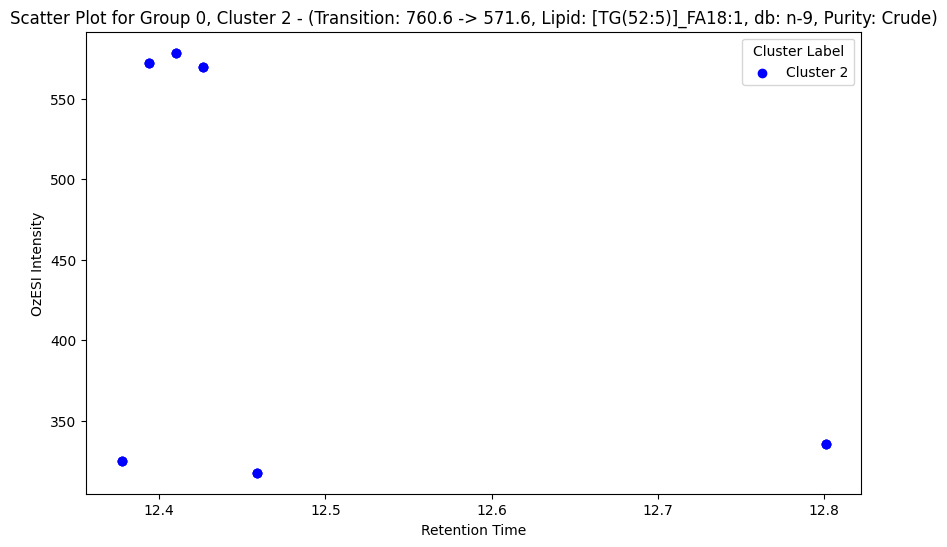

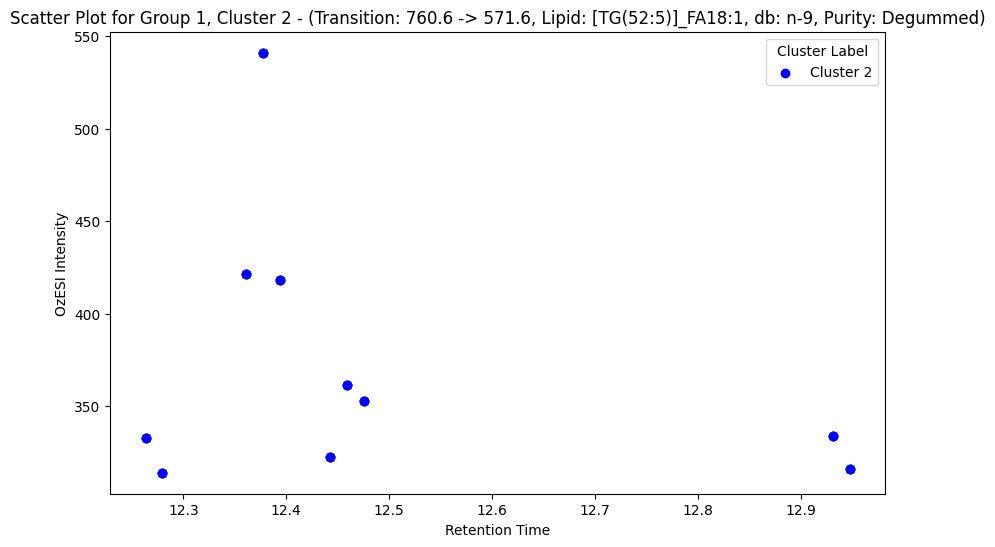

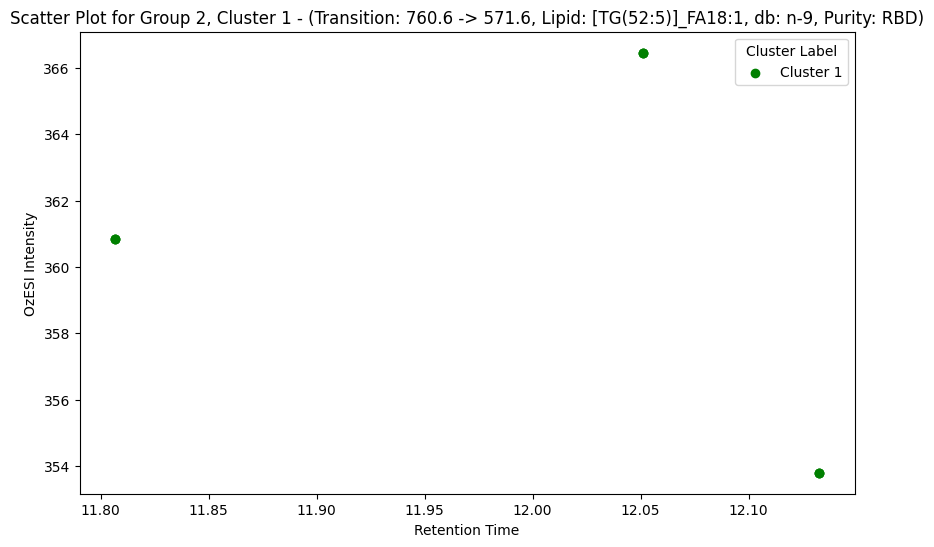

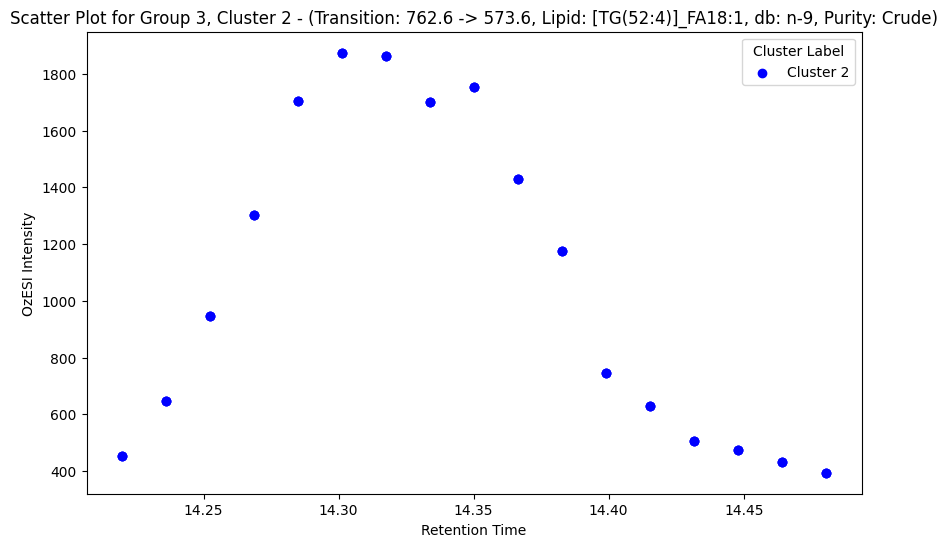

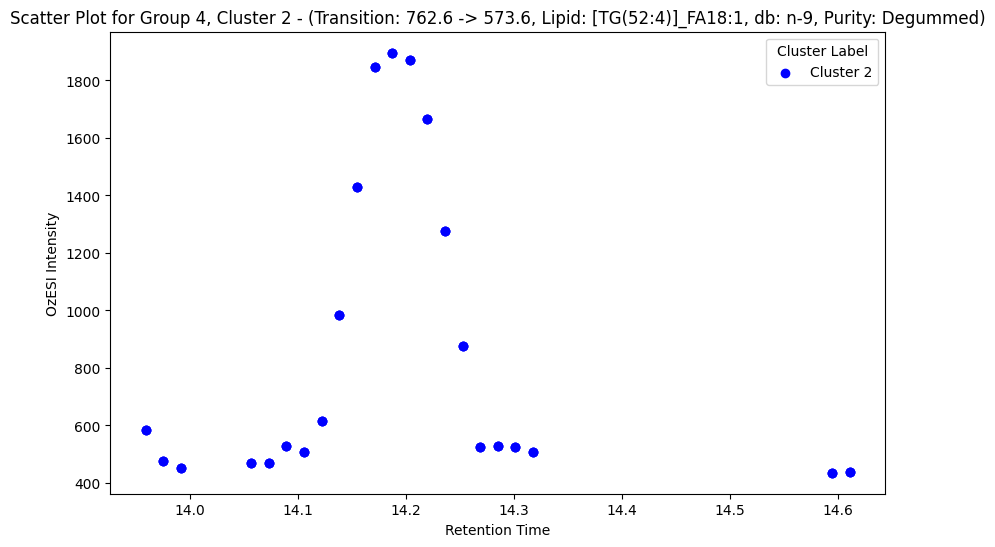

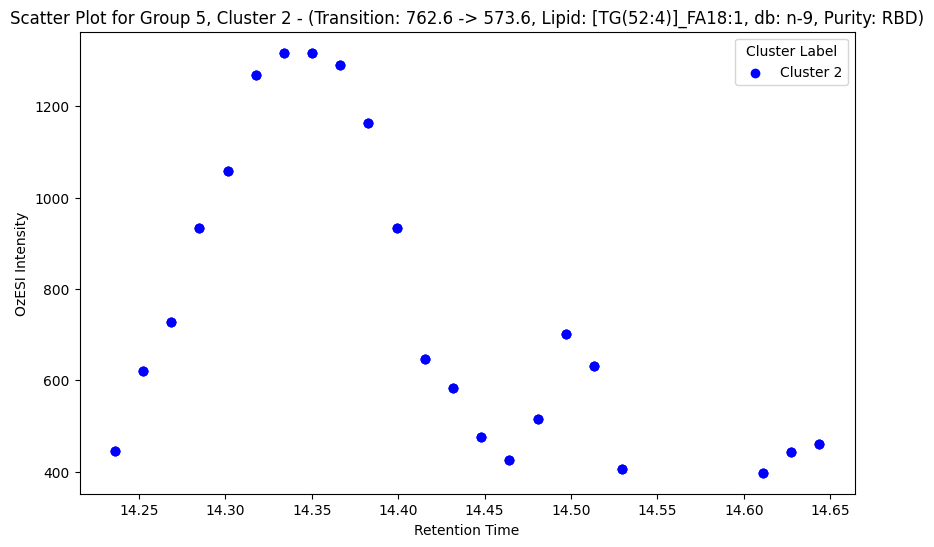

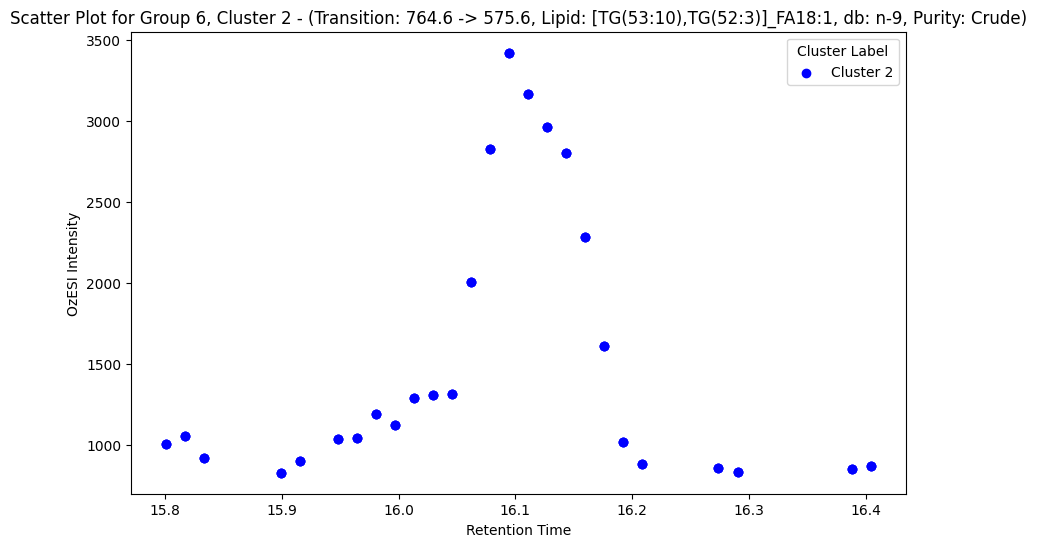

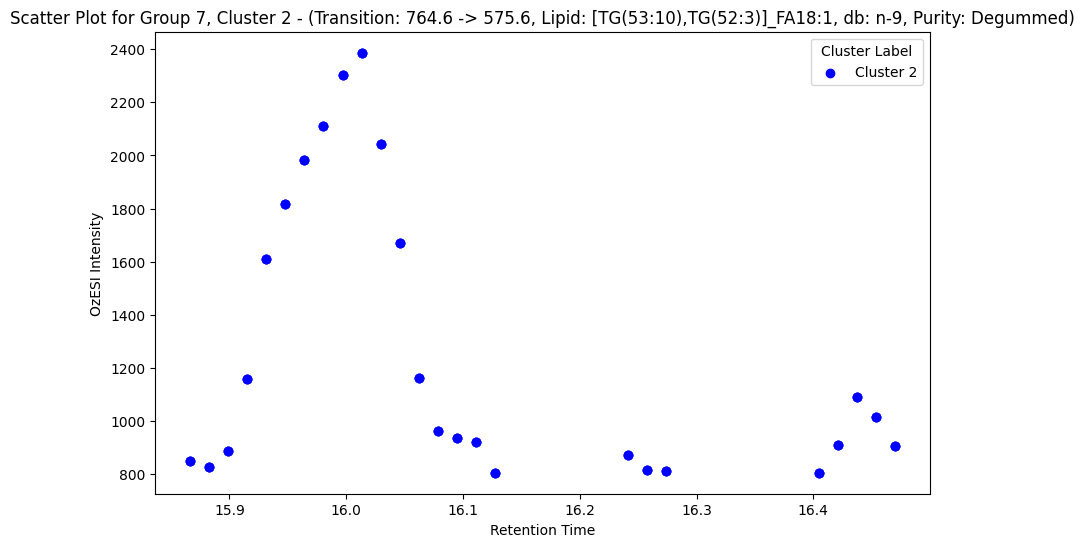

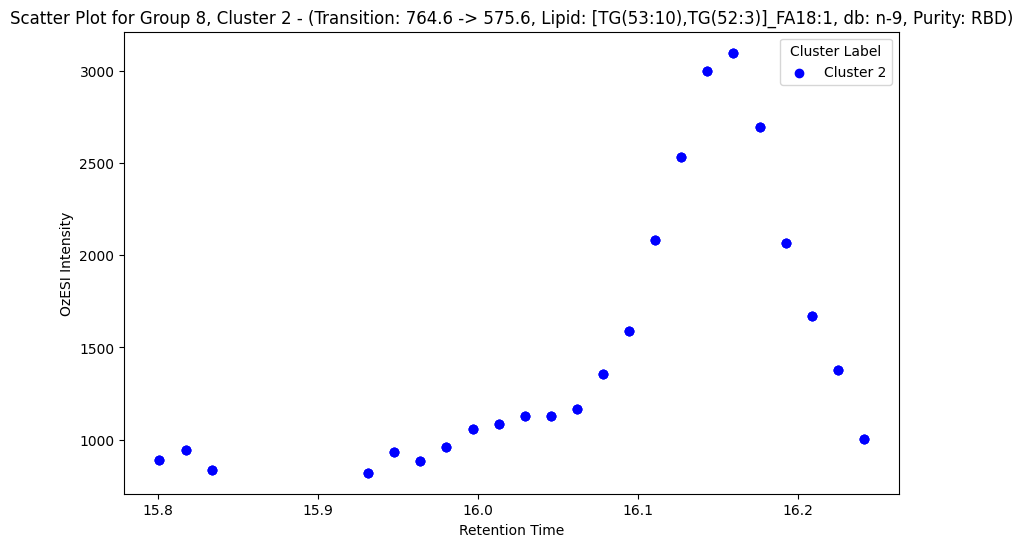

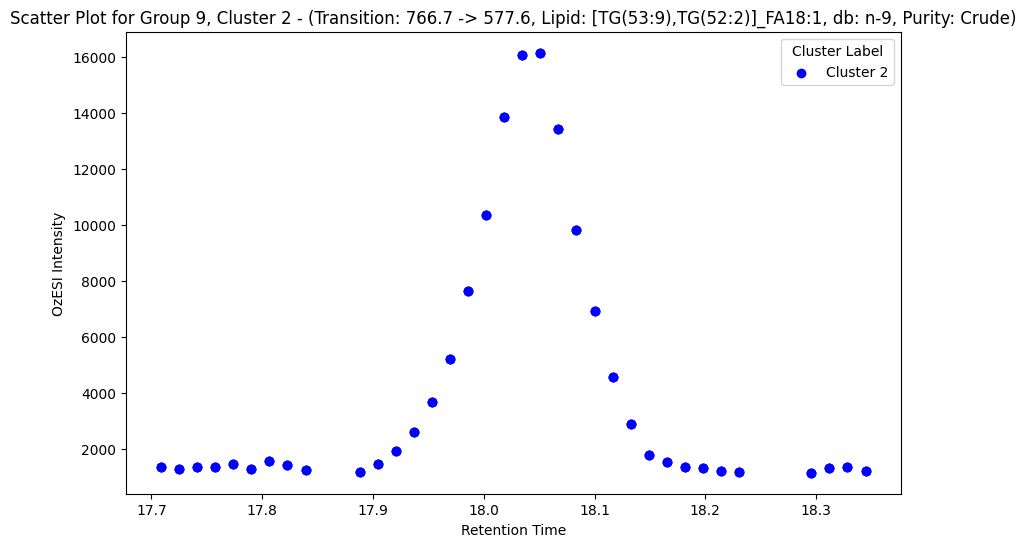

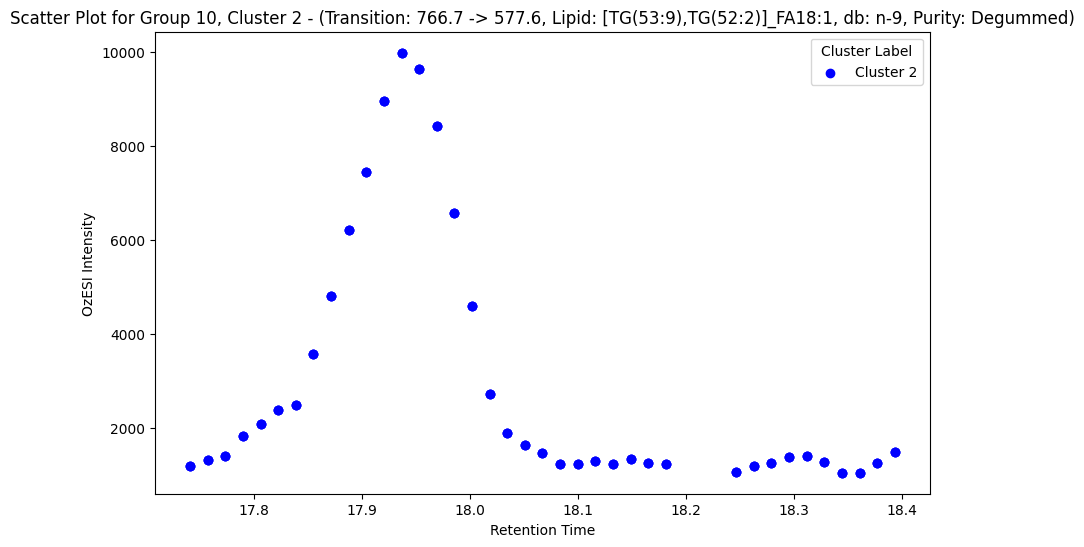

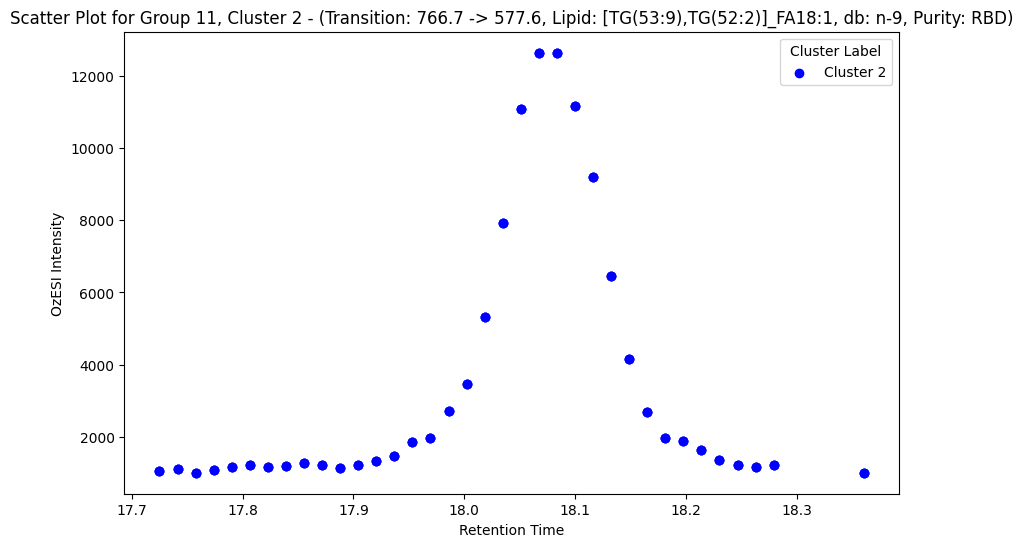

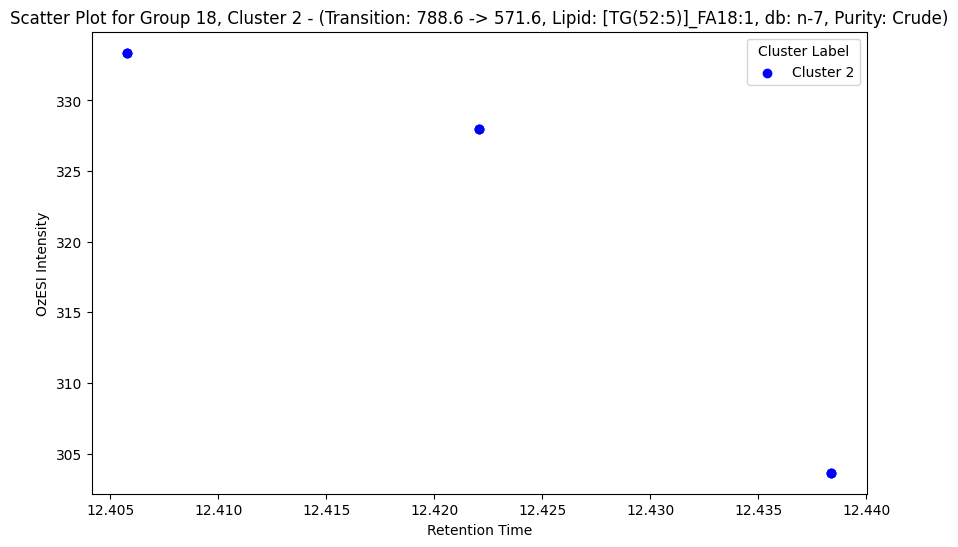

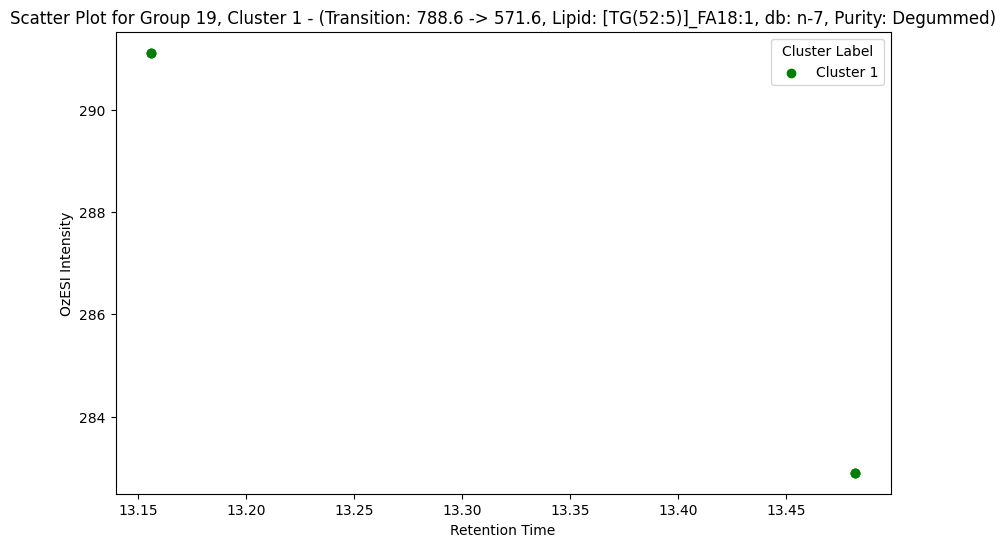

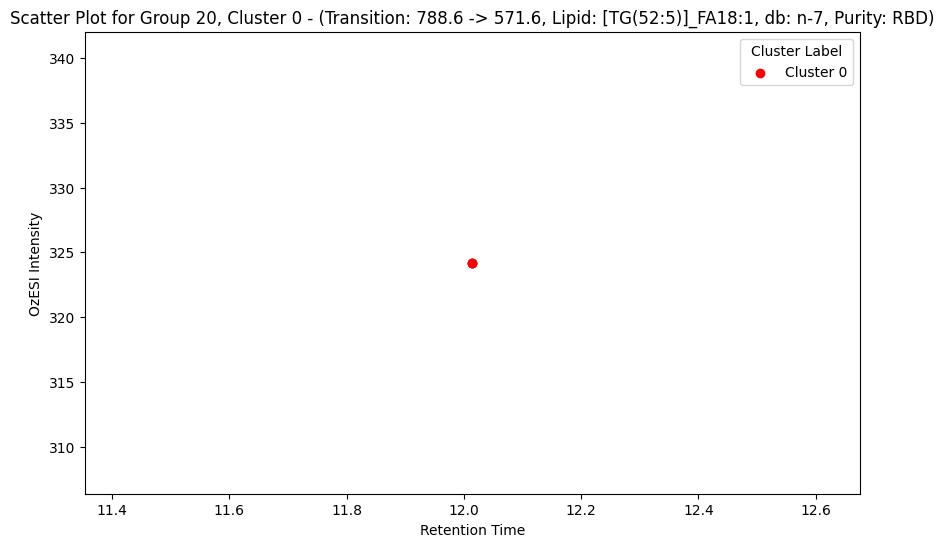

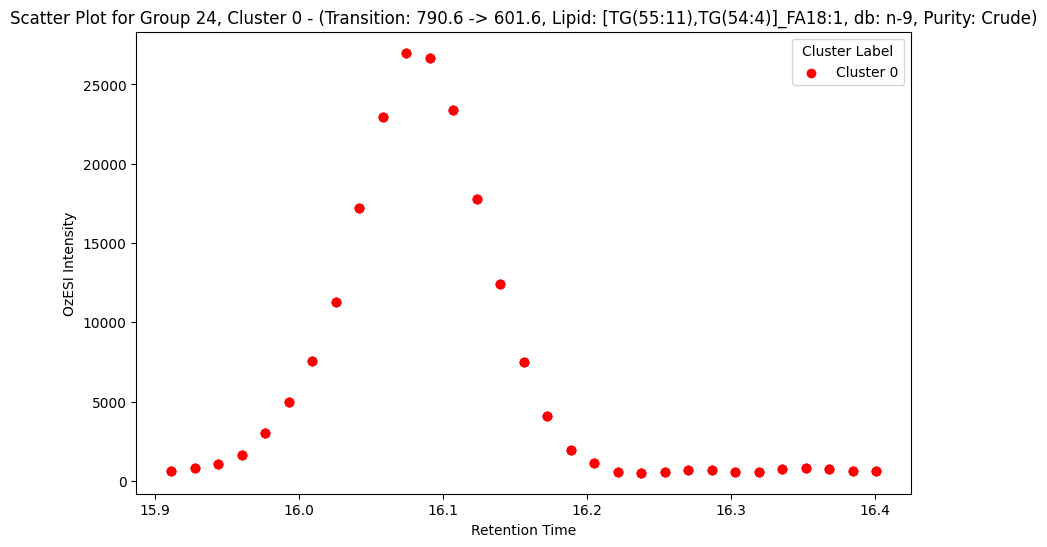

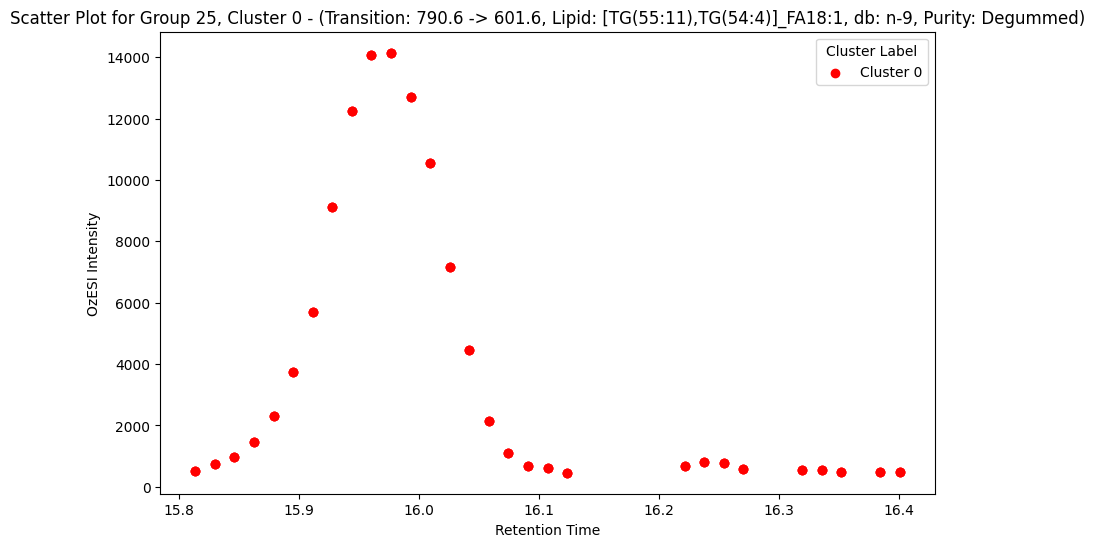

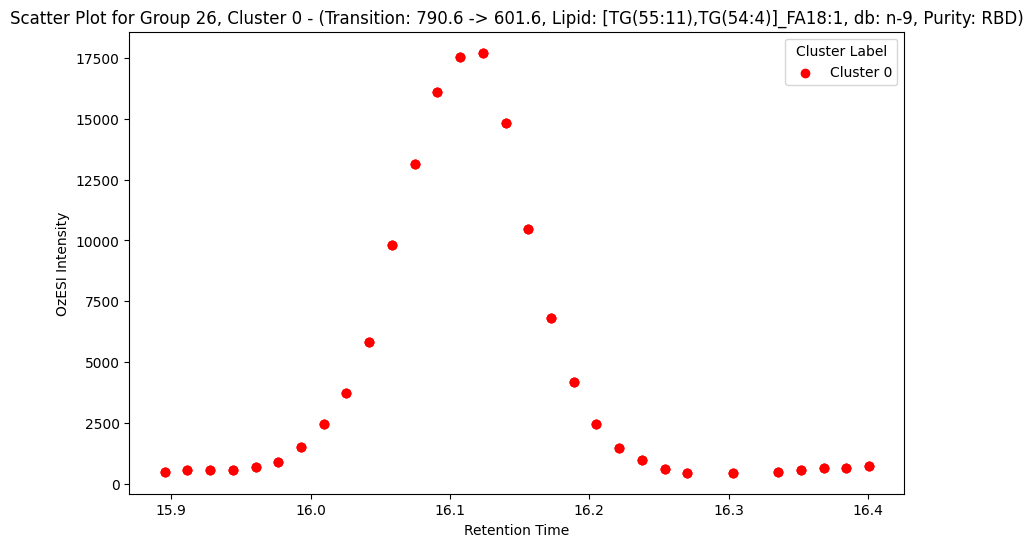

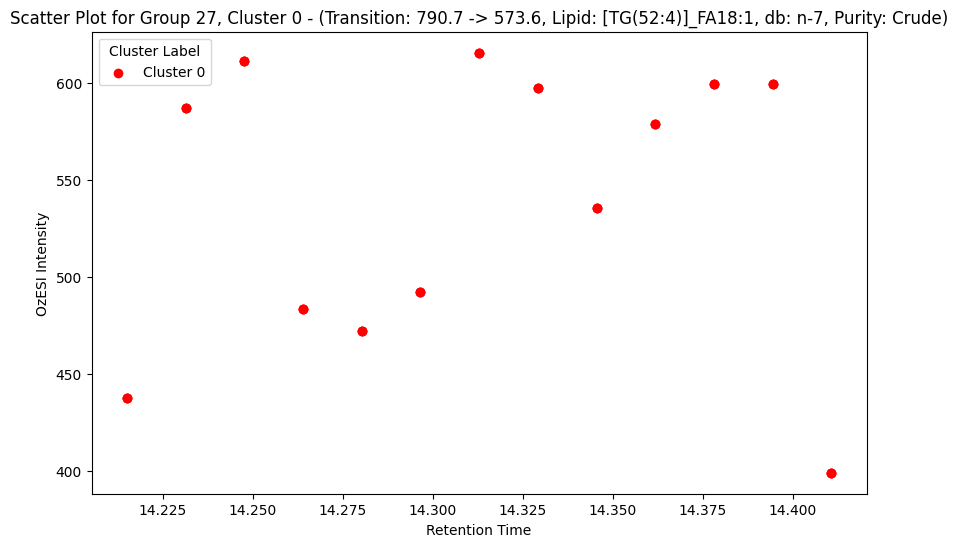

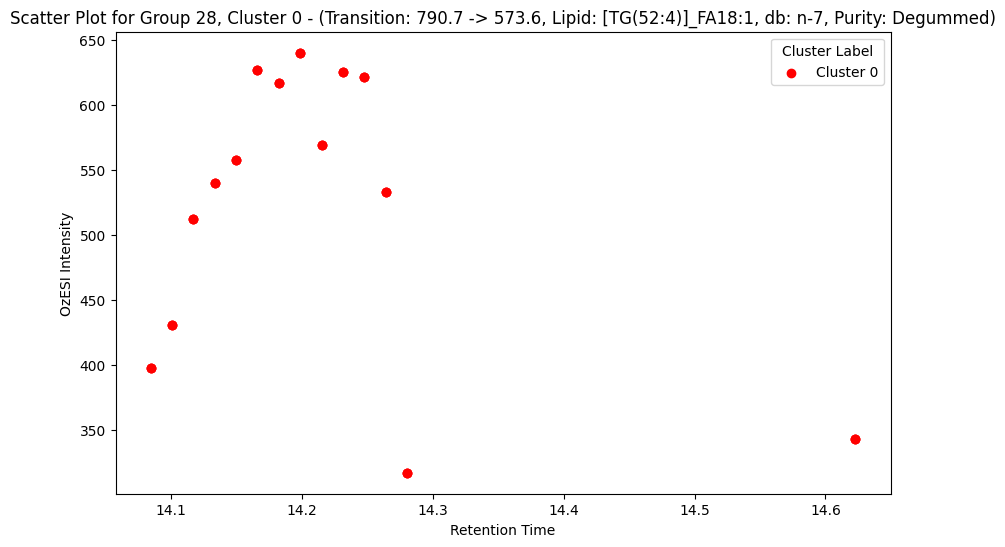

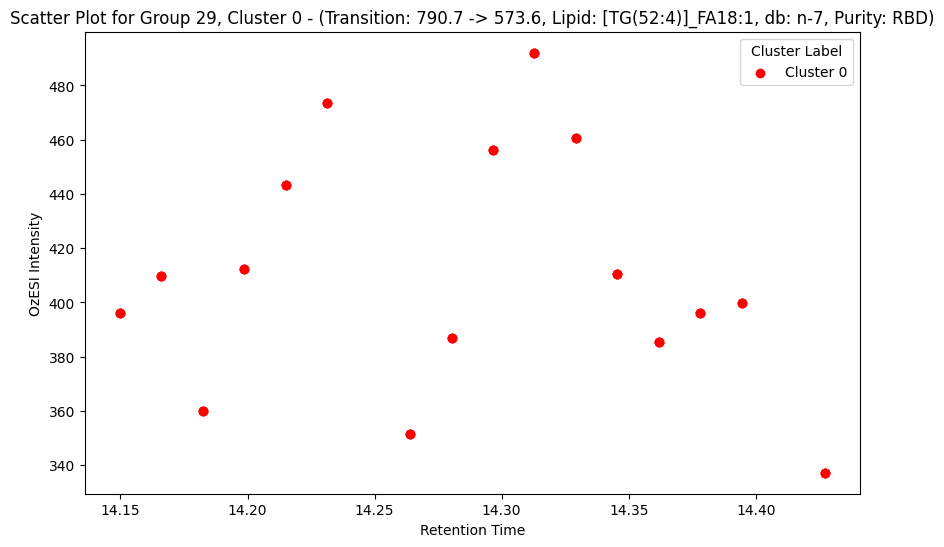

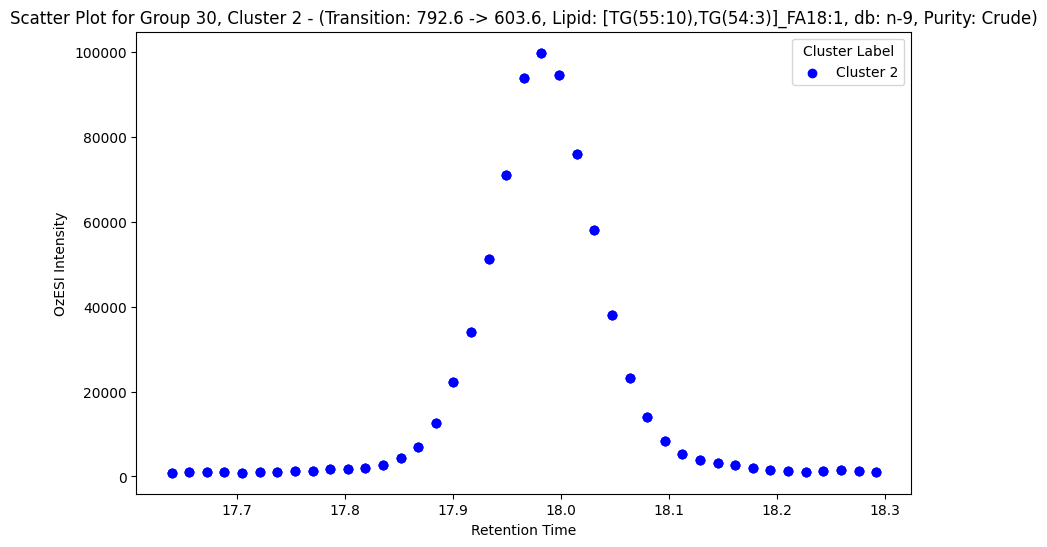

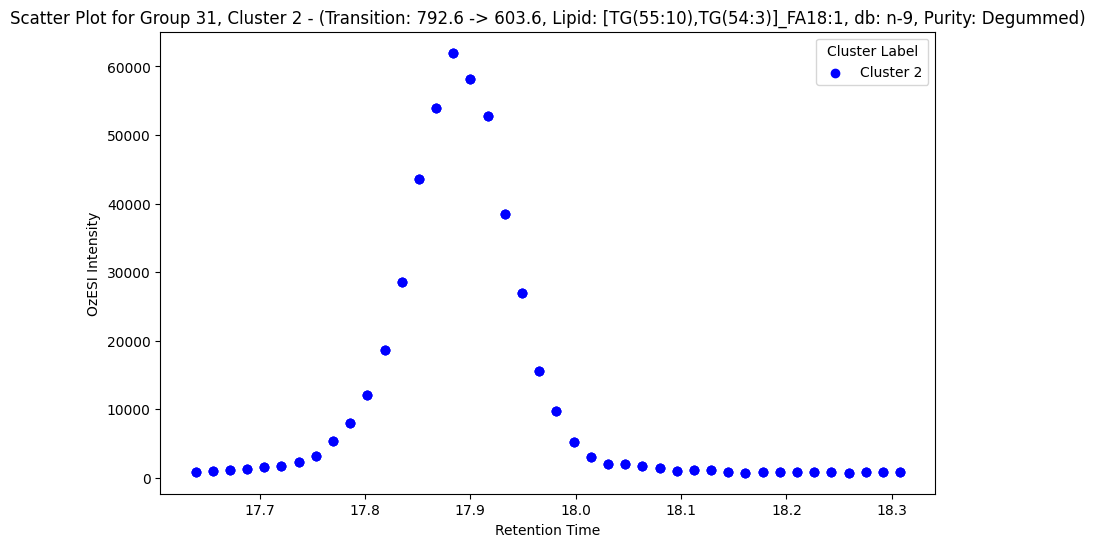

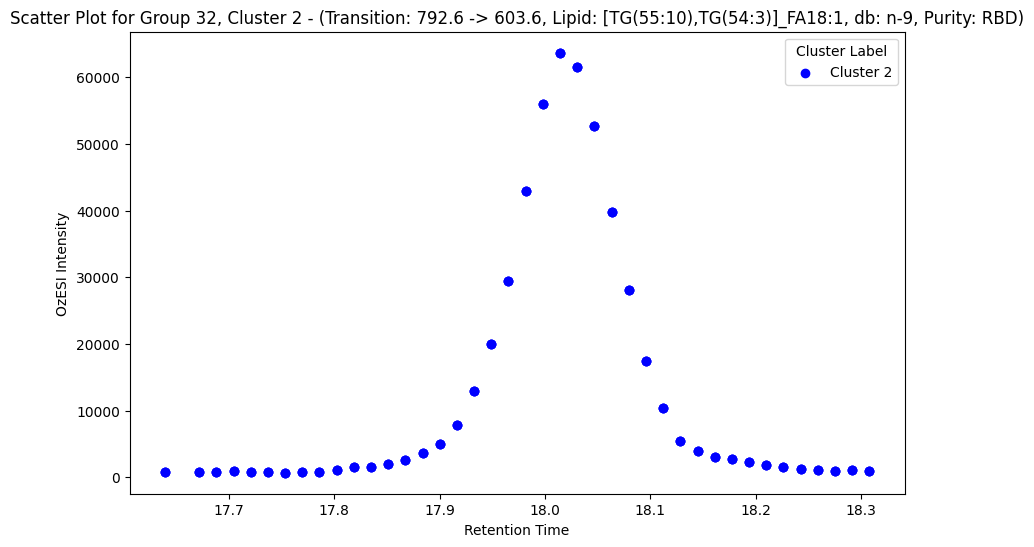

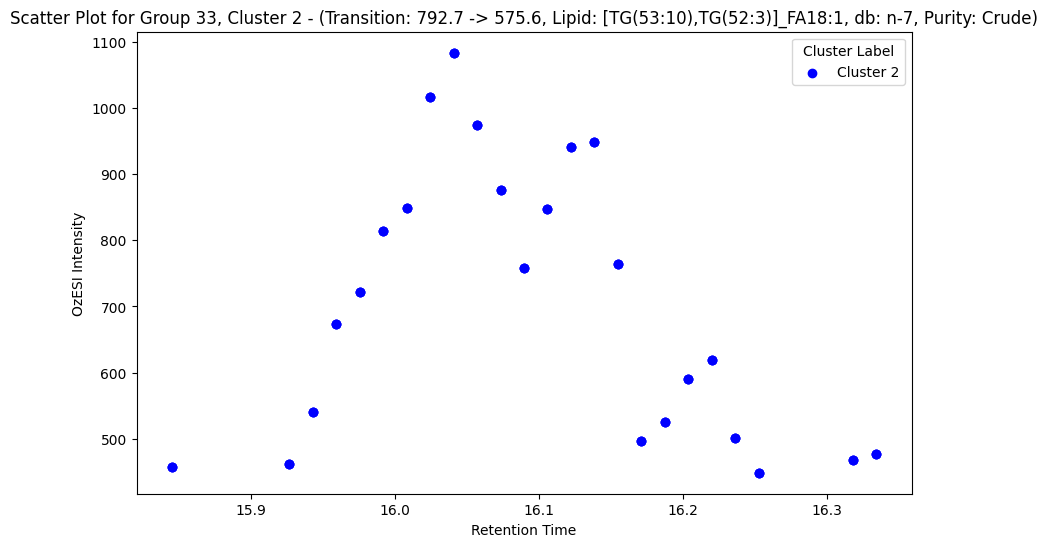

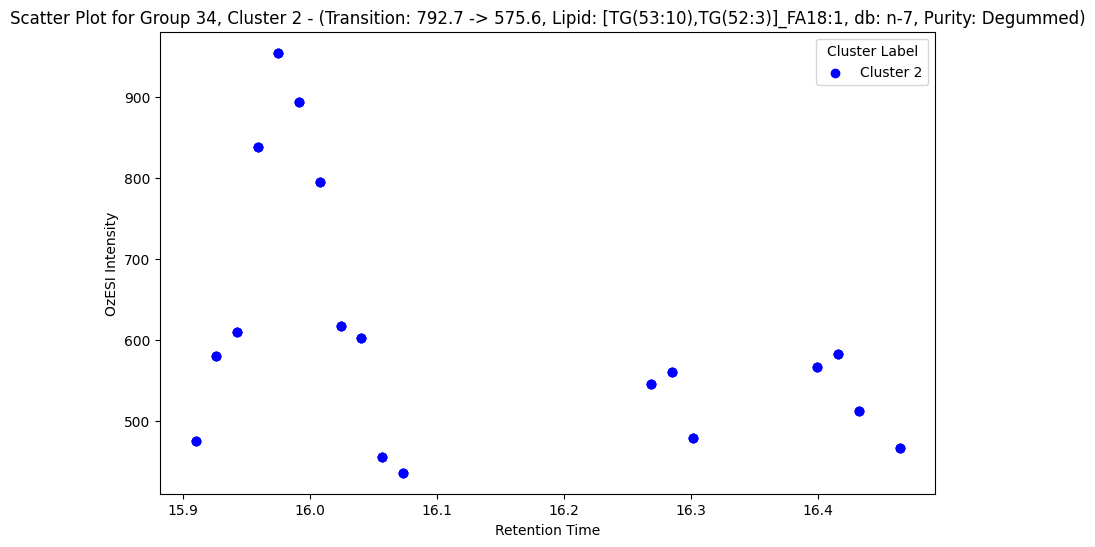

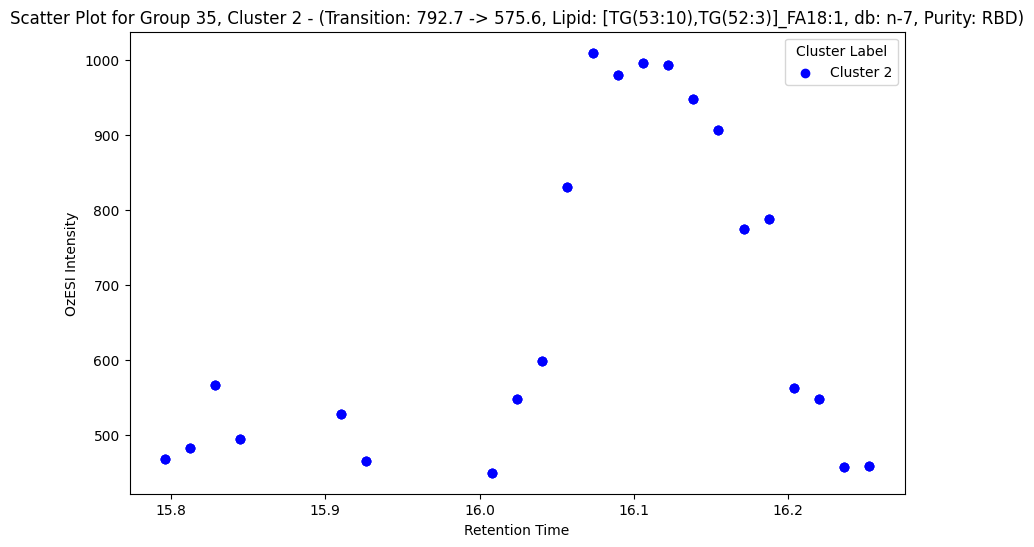

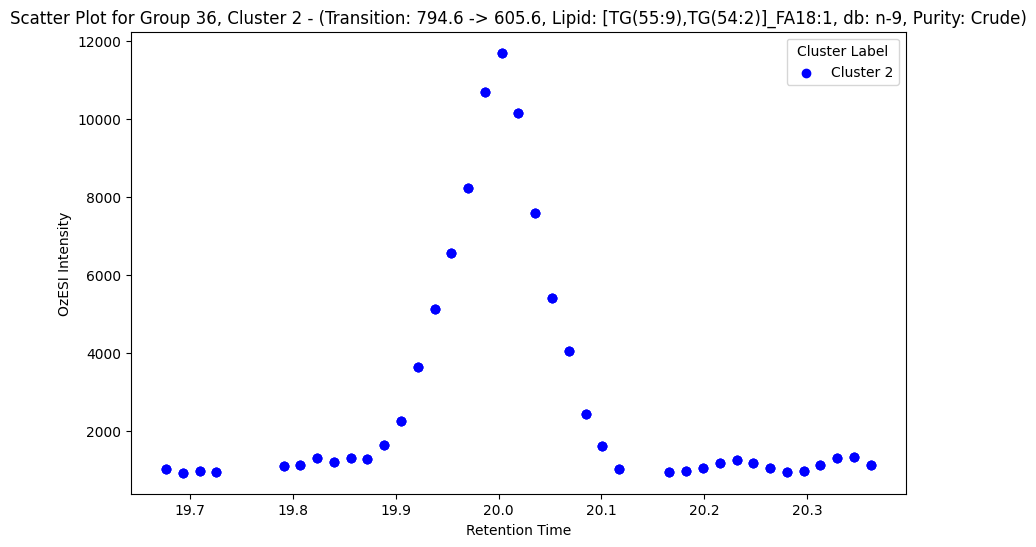

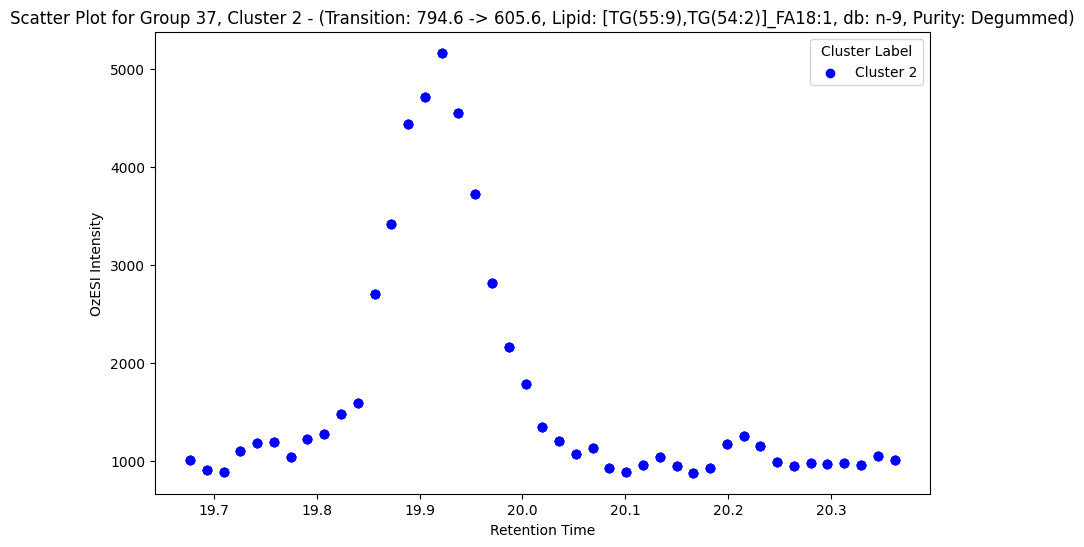

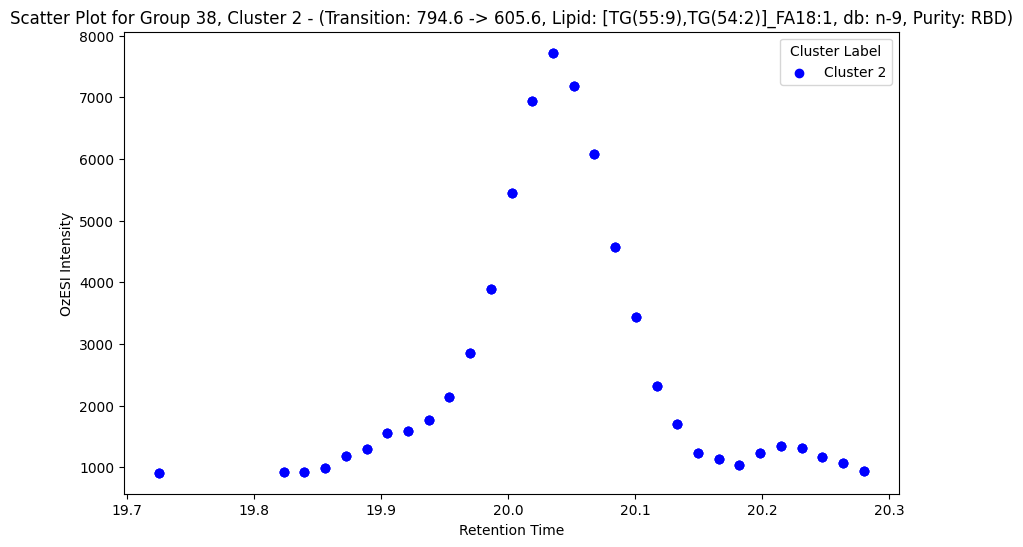

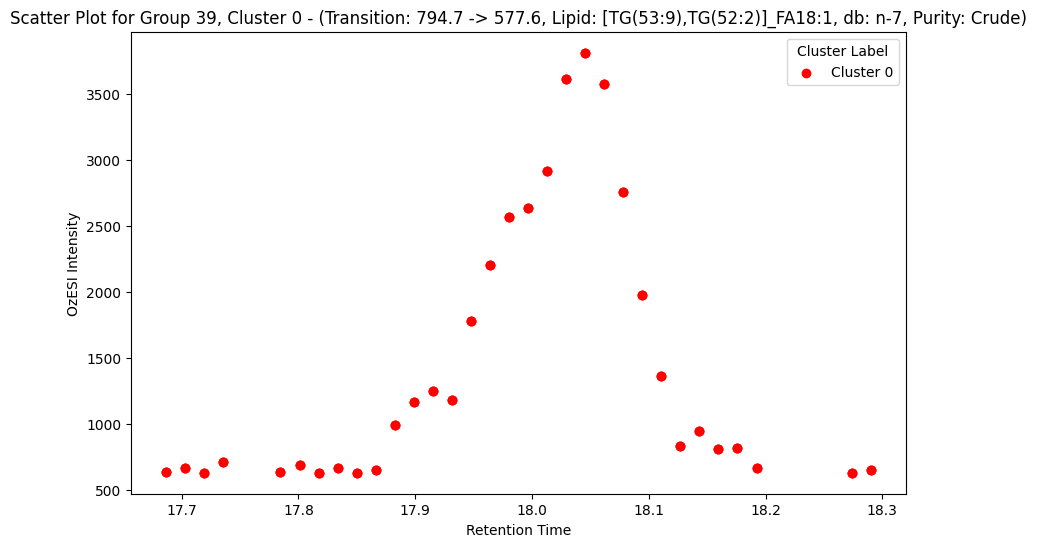

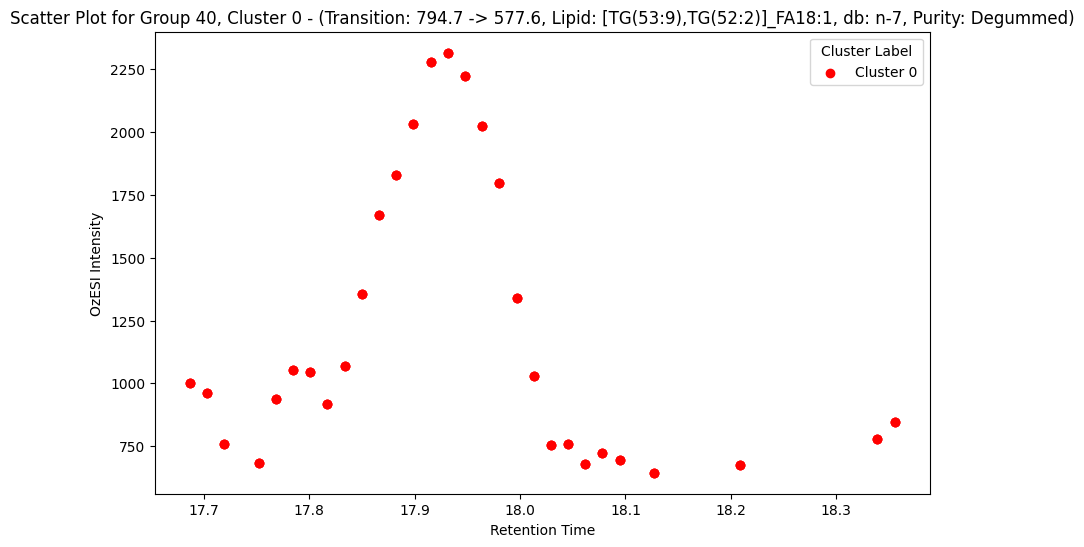

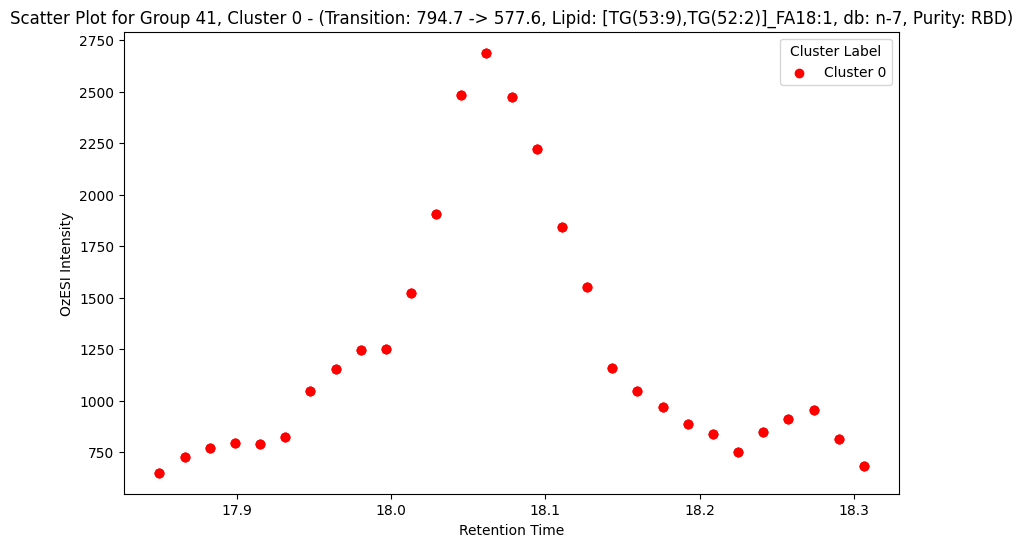

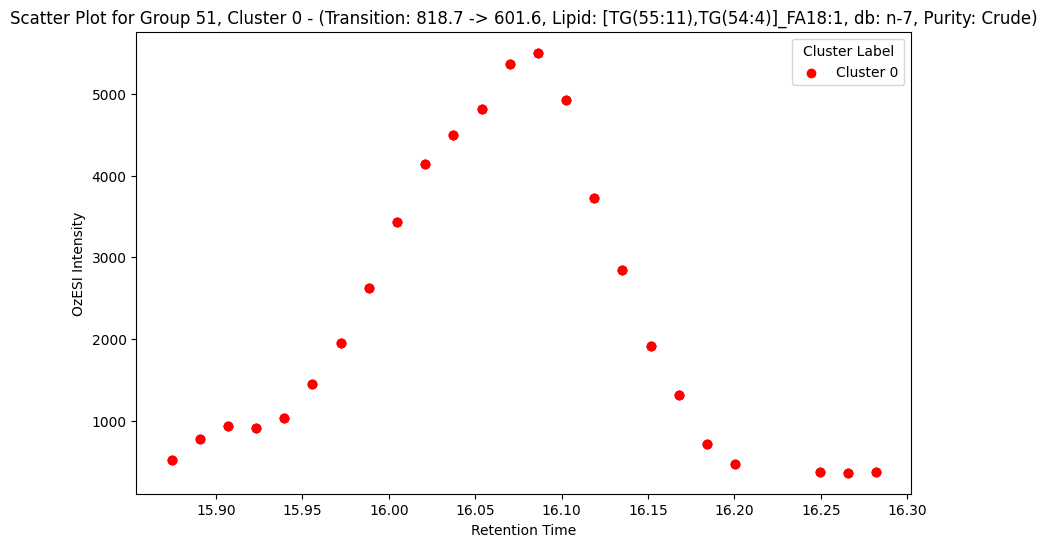

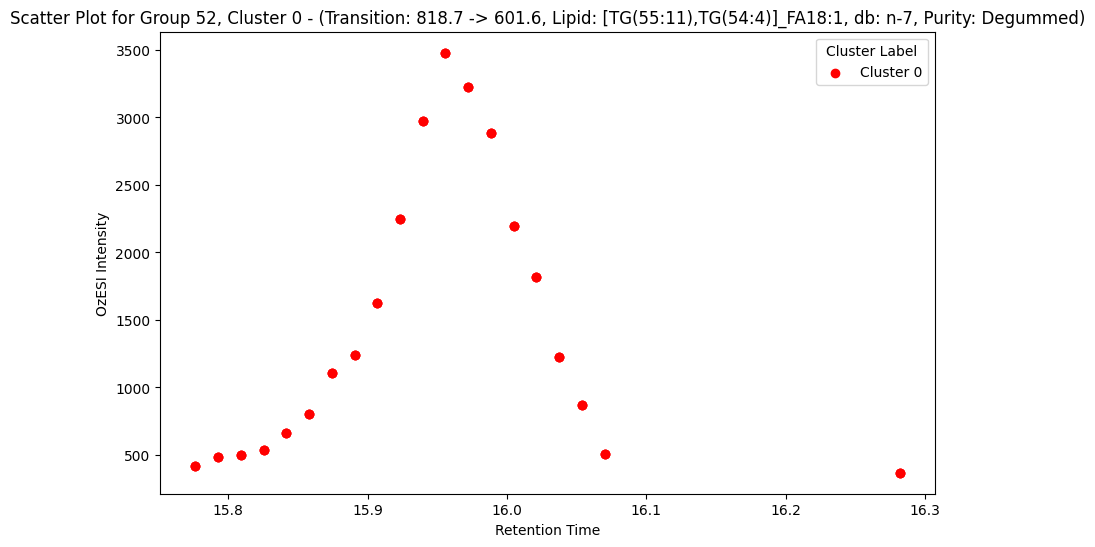

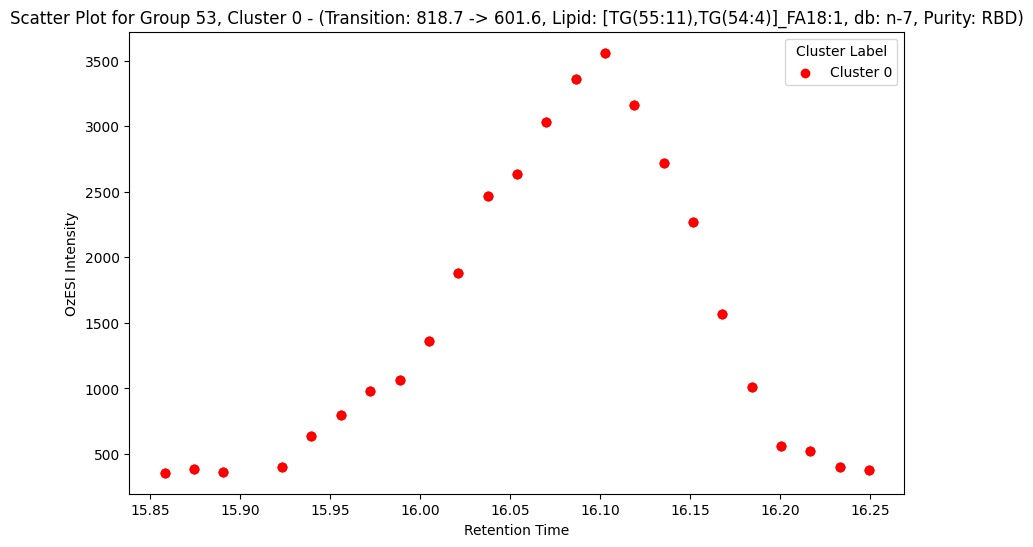

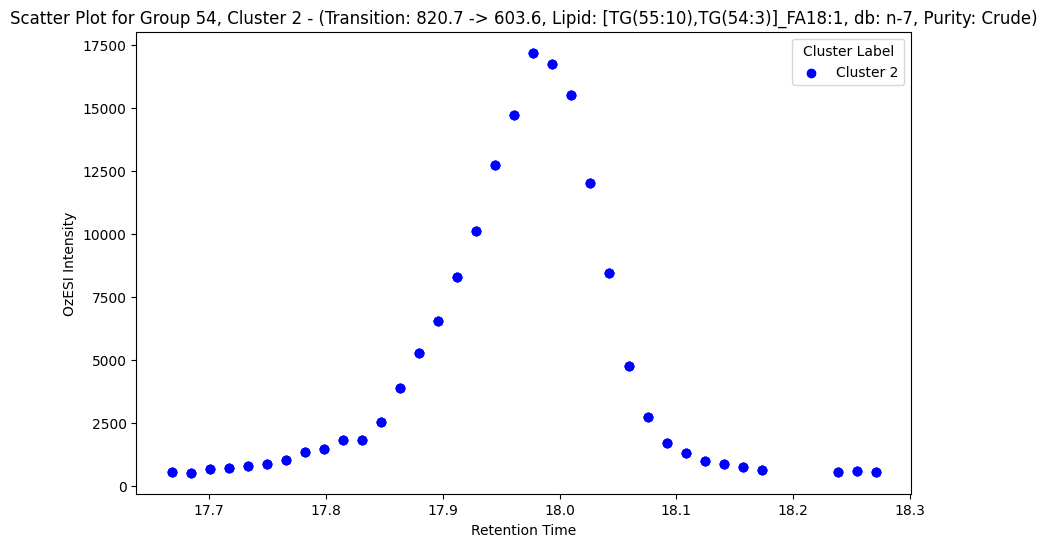

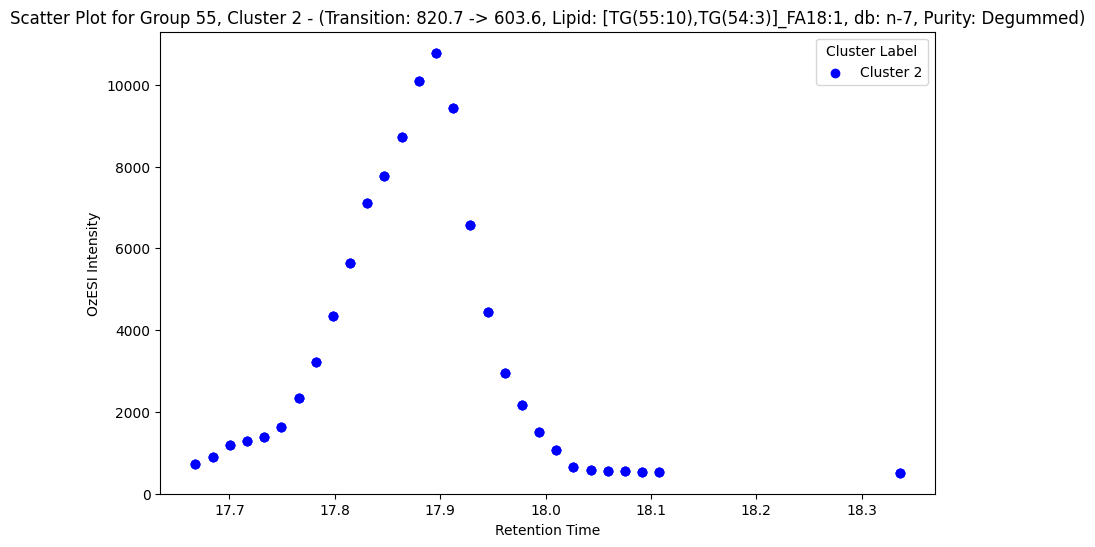

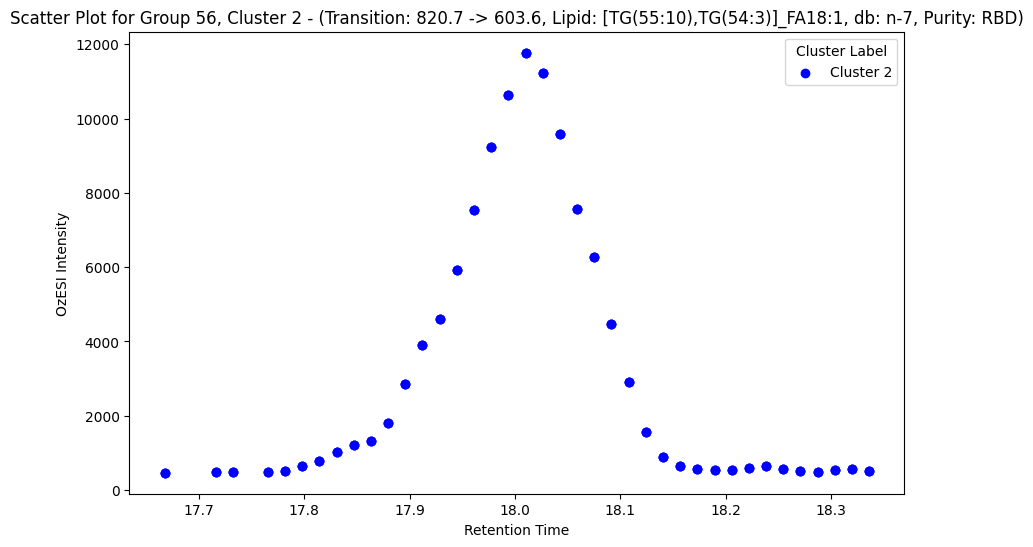

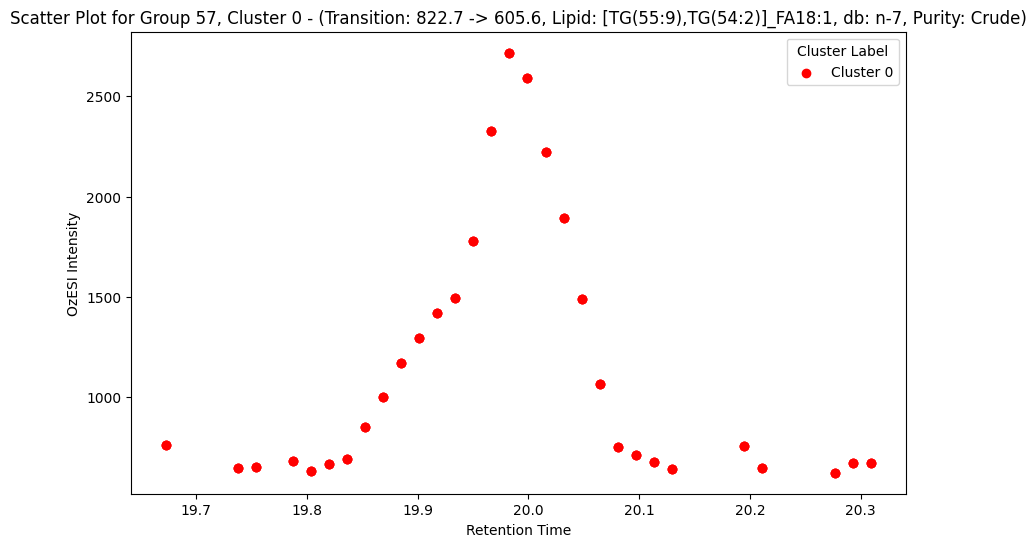

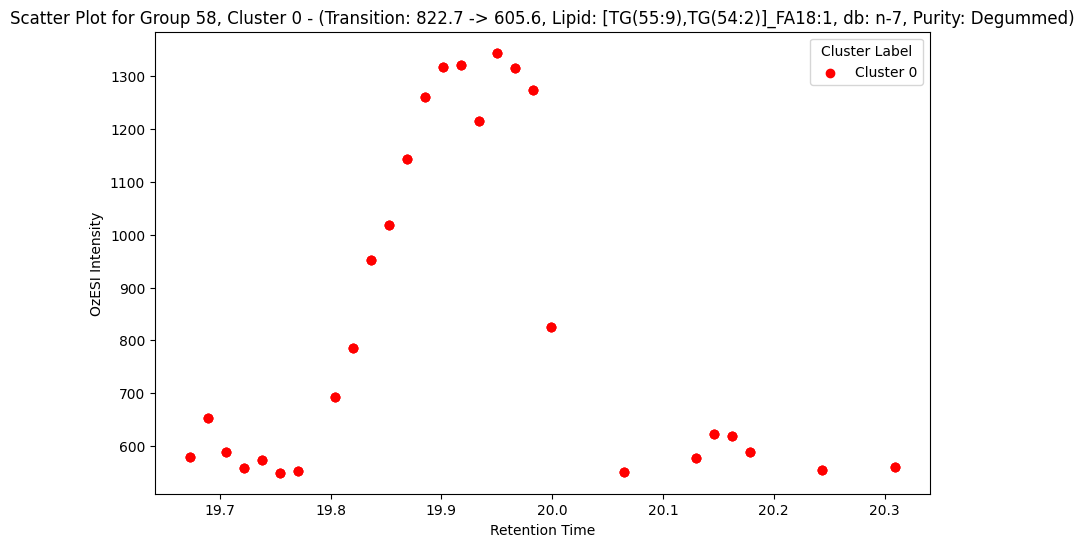

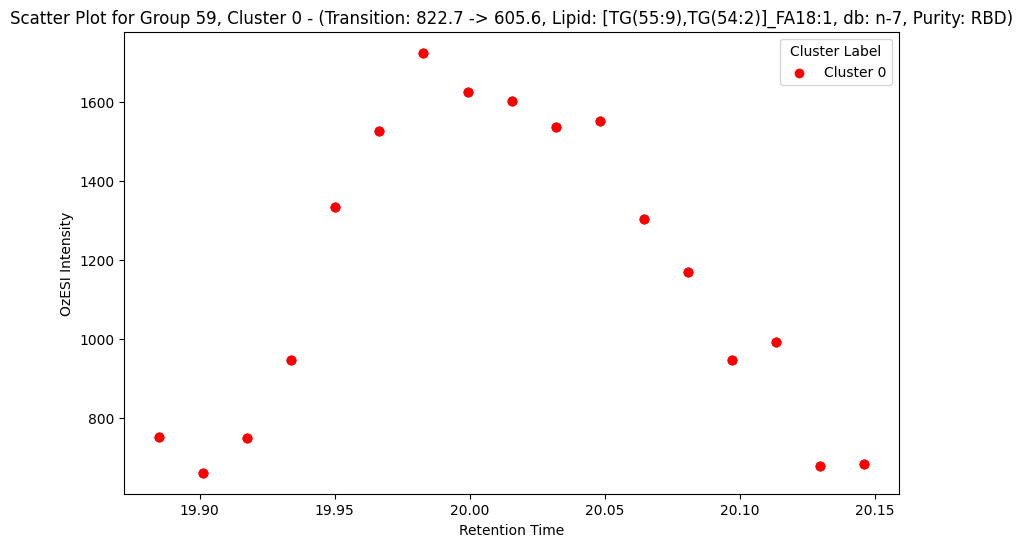

In [2076]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Assuming 'Purity' and 'Cluster_Label' are categorical columns in d5e_unique

# Define a color map for Cluster_Label
cluster_label_color_map = {
    0: 'red',
    1: 'green',
    2: 'blue',
    # Add more colors if there are more Cluster_Label values
}

# Define the directory where the plots will be saved
save_directory = 'Projects/canola/plots/val_purity/'  # Update this path to your desired directory

d5e_unique = d5g.copy()
d5e_unique = d5e_unique[~d5e_unique['Lipid'].str.contains('TG\(53:0\)')]
# d5e_unique = d5e_unique[~d5e_unique['Lipid'].str.contains('TG\(52:5\)')]
d5e_unique = d5e_unique[~d5e_unique['Lipid'].str.contains('TG\(54:6\)')]
d5e_unique = d5e_unique[~d5e_unique['Lipid'].str.contains('TG\(54:5\)')]
# Get unique Group values from d5e_unique
unique_groups = d5e_unique['Group'].unique()


# Find the cluster with the highest area for each group
highest_area_clusters = d5e_unique.groupby(['Group', 'Cluster_Label'])['Area'].sum().reset_index().sort_values('Area', ascending=False).drop_duplicates('Group')

# Iterate through each unique group
for group in unique_groups:
    # Filter the data for each Group
    group_filtered_data = d5e_unique[d5e_unique['Group'] == group]

    if not group_filtered_data.empty:
        # Find the cluster with the highest area in this group
        highest_area_cluster = highest_area_clusters[highest_area_clusters['Group'] == group]['Cluster_Label'].iloc[0]

        # Filter data for the cluster with the highest area within the group
        cluster_filtered_data = group_filtered_data[group_filtered_data['Cluster_Label'] == highest_area_cluster]

        # Extract values
        transition_value = cluster_filtered_data['Transition'].iloc[0]
        lipid_name = cluster_filtered_data['Lipid'].iloc[0]
        db_value = cluster_filtered_data['db'].iloc[0]
        purity_value = cluster_filtered_data['Purity'].iloc[0]

        # Set up the plot for the highest area cluster within the group
        plt.figure(figsize=(10, 6))
        plt.scatter(cluster_filtered_data['Retention_Time'], cluster_filtered_data['OzESI_Intensity'], c=cluster_label_color_map[highest_area_cluster], label=f'Cluster {highest_area_cluster}')

        # Add labels and title including Purity, Group, and Cluster_Label
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.title(f'Scatter Plot for Group {group}, Cluster {highest_area_cluster} - (Transition: {transition_value}, Lipid: {lipid_name}, db: {db_value}, Purity: {purity_value})')

        # Create a legend for Cluster Label
        plt.legend(title='Cluster Label')

        # Save the plot as a PNG file
        # filename = f'Group{group}_Cluster{highest_area_cluster}_{lipid_name}_{db_value}_{purity_value}.png'
        # plt.savefig(os.path.join(save_directory, filename), bbox_inches='tight')

        # Show the plot
        plt.show()


# detect and Refine peaks

Peak at index 13: Start Time = 17.898766666666667, End Time = 18.22491666666667
Peak at index 42: Start Time = 17.898766666666667, End Time = 18.22491666666667
Peak at index 71: Start Time = 17.898766666666667, End Time = 18.22491666666667


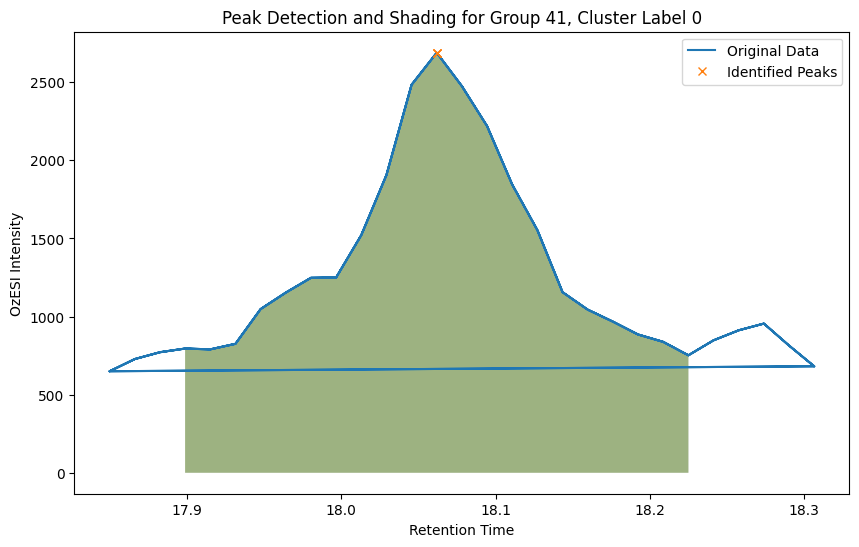

In [2099]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def detect_peaks_and_shade(dataframe, group, cluster_label, prominence=500, height=100, window=10):
    """
    Detect peaks in a given DataFrame for specified Group and Cluster_Label and shade the area under the peak.

    Parameters:
    - dataframe: DataFrame containing the data.
    - group: The Group value for which peaks need to be detected.
    - cluster_label: The Cluster_Label value for which peaks need to be detected.
    - prominence: Minimum prominence of peaks.
    - height: Minimum height of peaks.
    - window: Number of points on each side of the peak to consider for shading.

    Returns:
    - A list of indices where peaks are detected.
    """
    # Filter data for specified Group and Cluster_Label
    filtered_data = dataframe[(dataframe['Group'] == group) & (dataframe['Cluster_Label'] == cluster_label)]

    # Extract Retention_Time and OzESI_Intensity
    retention_time = filtered_data['Retention_Time']
    intensity = filtered_data['OzESI_Intensity']

    # Detect peaks
    peaks, _ = find_peaks(intensity, prominence=prominence, height=height)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(retention_time, intensity, label='Original Data')

    # Iterate over detected peaks
    for peak in peaks:
        start = max(0, peak - window)
        end = min(len(retention_time) - 1, peak + window)
        
        # Shade the area under the peak
        plt.fill_between(retention_time[start:end+1], intensity[start:end+1], alpha=0.3)

        # Print start and end retention times
        start_time = retention_time.iloc[start]
        end_time = retention_time.iloc[end]
        print(f"Peak at index {peak}: Start Time = {start_time}, End Time = {end_time}")

    # Mark peaks
    plt.plot(retention_time.iloc[peaks], intensity.iloc[peaks], "x", label='Identified Peaks')
    
    plt.xlabel('Retention Time')
    plt.ylabel('OzESI Intensity')
    plt.title(f'Peak Detection and Shading for Group {group}, Cluster Label {cluster_label}')
    plt.legend()
    plt.show()

    return peaks

# Example usage
group = 41
cluster_label = 0
peaks = detect_peaks_and_shade(d5g, group, cluster_label)


In [2098]:
from scipy.integrate import trapz

def calculate_peak_areas(dataframe, peaks, window=10):
    """
    Calculate the area under each peak using the trapezoidal rule.

    Parameters:
    - dataframe: DataFrame containing the data.
    - peaks: Indices of detected peaks.
    - window: Number of points on each side of the peak to consider for area calculation.

    Returns:
    - A list of areas under each peak.
    """
    areas = []
    for peak in peaks:
        # Define the range around the peak
        start = max(0, peak - window)
        end = min(len(dataframe) - 1, peak + window)

        # Extract the relevant segment
        x = dataframe['Retention_Time'].iloc[start:end+1]
        y = dataframe['OzESI_Intensity'].iloc[start:end+1]

        # Calculate the area
        area = trapz(y, x)
        areas.append(area)

    return areas

# Calculate areas for the detected peaks
areas = calculate_peak_areas(d5g, peaks)
areas


[321.2383366335555, 40.711480329386184, -547.6557845130922]

In [ ]:
import pandas as pd
d5h = d5g.copy()
# Assuming d5 is your DataFrame
# First, find the row in each group with the max OzESI_Intensity
max_intensity_rows = d5h.loc[d5h.groupby(['Lipid', 'Sample_ID', 'db'])['OzESI_Intensity'].idxmax()]

# Create a new DataFrame with the necessary columns
max_rt_df = max_intensity_rows[['Lipid', 'Sample_ID', 'db', 'Retention_Time']]

# Rename the 'Retention_Time' column to 'Cluster_RT'
max_rt_df.rename(columns={'Retention_Time': 'Cluster_RT'}, inplace=True)
#round the retention time to 2 decimal places
max_rt_df['Cluster_RT'] = max_rt_df['Cluster_RT'].round(2)

# Merge this back with the original d5h DataFrame
# This adds the 'Cluster_RT' column to d5h, aligning each row with its corresponding retention time for the max intensity
d5h = pd.merge(d5h, max_rt_df, on=['Lipid', 'Sample_ID', 'db'])

# Now d5h will have an additional column 'Cluster_RT' which is the retention time for the max intensity for each Lipid-Cluster for each Sample_ID
d5h

import pandas as pd

# Assuming d5h is your DataFrame and Lipid is a column in it
# Filter rows where the Lipid column contains the string "TG(54:2)"
filtered_rows = d5h[d5h['Lipid'].str.contains("TG\(52:3\)")]

# # Print the filtered rows from the Lipid column
# filtered_rows

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/pandas/core/frame.py:4446: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


# compare d5 cluster RT to ground truth RT in df_db_pos

In [ ]:
import pandas as pd
import numpy as np

# Step 1: Create a mapping from Lipid to ground truth Retention_Time in df_db_pos
ground_truth_rt = dict(zip(df_db_pos['Lipid'], df_db_pos['Retention_Time']))

# # Step 2: Calculate the distance to the ground truth for each row in d5h
# d5['distance_to_truth'] = d5.apply(lambda row: abs(row['Cluster_RT'] - ground_truth_rt.get(row['Lipid'], np.nan)), axis=1)
# Step 2: Calculate the distance to the ground truth for each row in d5
d5h['distance_to_truth'] = d5h.apply(lambda row: abs(row['Retention_Time'] - ground_truth_rt.get(row['Lipid'], np.nan)), axis=1)

# Step 3: Retain only the cluster closest to the ground truth for each Sample_ID and Lipid
closest_clusters = d5h.loc[d5h.groupby(['Sample_ID', 'Lipid','db'])['distance_to_truth'].idxmin()]

# # Optional: Drop the 'distance_to_truth' column if no longer needed
# closest_clusters = closest_clusters.drop(columns=['distance_to_truth'])

closest_clusters

d5h = closest_clusters.copy()
# d5h



In [ ]:
# # Assuming d5a is your actual DataFrame and contains Groups 4 and 27

# # Extract the 'Area' for Group 4
# area_group_4 = d5f[d5f['Group'] == 4]['Area_DDT'].iloc[0] if not d5f[d5f['Group'] == 4].empty else "Group 4 not found"

# # Extract the 'Area_DDT' for Group 27
# area_group_27 = d5f[d5f['Group'] == 28]['Area_DDT'].iloc[0] if not d5f[d5f['Group'] == 28].empty else "Group 27 not found"

# print("Area_DDT for Group 4:", area_group_4)
# print("Area_DDT for Group 28:", area_group_27)


# Remove clusters not being used

In [ ]:
#based on sample_ID Lipid and db pos, keep the unique value with the highest intensity
# Sort the DataFrame by 'OzESI_Intensity' in descending order to ensure the highest intensity is first

d6 = d5h.copy()
# Assuming your DataFrame is named d6
d6 = d6[d6['db'] != '']
d6




#sort d6 by max OzESI_Intensity
d6 = d6.sort_values(by='OzESI_Intensity', ascending=False)

d6 = d6.groupby(['Lipid', 'Sample_ID', 'db']).first().reset_index()



#round the retention time to 2 decimal places
d6['Retention_Time'] = d6['Retention_Time'].round(2)
#round intensity to 0 decimal places
d6['OzESI_Intensity'] = d6['OzESI_Intensity'].round(0)

# d6

Calculate Area Ratio

In [ ]:
# import pandas as pd

# # Filter for 'n-9' and 'n-7' in the 'db' column
# filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# # Group by 'Lipid' and 'Sample_ID'
# grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# # DataFrame for Area Ratios
# area_ratios = pd.DataFrame(columns=['Lipid', 'Sample_ID', 'Area_Ratio'])

# # Calculate Area Ratio for each group
# for (lipid, sample_id), group in grouped:
#     n9_area = group[group['db'] == 'n-9']['Area'].sum()  # Sum if there are multiple 'n-9' entries
#     n7_area = group[group['db'] == 'n-7']['Area'].sum()  # Sum if there are multiple 'n-7' entries
#     ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

#     # Append to DataFrame
#     area_ratios = area_ratios.append({
#         'Lipid': lipid,
#         'Sample_ID': sample_id,
#         'Area_Ratio': ratio
#     }, ignore_index=True)

# # Merge the Area Ratio DataFrame with the original DataFrame
# d7 = pd.merge(d6, area_ratios, on=['Lipid', 'Sample_ID'], how='left')

# d7.head(50)  # Display the updated DataFrame with 'Area_Ratio'


# calculte area Ratio for one

In [ ]:
# import pandas as pd

# # Assume d6 is your original DataFrame

# # Filter for 'n-9' and 'n-7' in the 'db' column
# filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# # Group by 'Lipid' and 'Sample_ID'
# grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# # Initialize Area_Ratio column in the original DataFrame
# d6['Area_Ratio'] = None

# # Calculate Area Ratio for each group and update the original DataFrame
# for (lipid, sample_id), group in grouped:
#     if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
#         n9_area = group[group['db'] == 'n-9']['Area'].sum()
#         n7_area = group[group['db'] == 'n-7']['Area'].sum()
#         ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

#         # Update only relevant rows in the original DataFrame
#         indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
#         d6.loc[indices, 'Area_Ratio'] = ratio

# # Now d6 should have the correctly assigned Area_Ratio
# d6  # Display the updated DataFrame



import pandas as pd

# Assume d6 is your original DataFrame

# Filter for 'n-9' and 'n-7' in the 'db' column
filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# Group by 'Lipid' and 'Sample_ID'
grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# Initialize Area_Ratio column in the original DataFrame
d6['Area_Ratio_DDT'] = None

# Calculate Area Ratio for each group and update the original DataFrame
for (lipid, sample_id), group in grouped:
    if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
        n9_area = group[group['db'] == 'n-9']['Area_DDT'].sum()
        n7_area = group[group['db'] == 'n-7']['Area_DDT'].sum()
        ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

        # Update only relevant rows in the original DataFrame
        indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
        d6.loc[indices, 'Area_Ratio_DDT'] = ratio



# Now d6 should have the correctly assigned Area_Ratio
d6  # Display the updated DataFrame


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Purity,...,Area_RT,Area,Area_HW,Group_Intensity,Group_Threshold,Area_DDT,Area_HW_DDT,Cluster_RT,distance_to_truth,Area_Ratio_DDT
0,[TG(52:4)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-7,790.7,573.6,14.31,615.0,790.7 -> 573.6,0,Crude,...,0.668617,210.0,234.0,"[85.60000610351562, 85.60000610351562, 85.6000...",320.0,107.0,120.0,14.31,0.007117,2.68
1,[TG(52:4)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,762.6,573.6,14.32,1863.0,762.6 -> 573.6,2,Crude,...,0.684933,412.0,320.0,"[147.92001342773438, 147.92001342773438, 147.9...",363.0,287.0,245.0,14.30,0.002483,2.68
2,[TG(52:4)]_FA18:1,DegummedCanola_O3on_150gN3_02082023,n-7,790.7,573.6,14.28,317.0,790.7 -> 573.6,0,Degummed,...,0.668633,207.0,234.0,"[50.70000457763672, 50.70000457763672, 50.7000...",311.0,221.0,344.0,14.20,0.039717,2.02
3,[TG(52:4)]_FA18:1,DegummedCanola_O3on_150gN3_02082023,n-9,762.6,573.6,14.32,508.0,762.6 -> 573.6,2,Degummed,...,0.684933,406.0,320.0,"[132.36001586914062, 132.36001586914062, 132.3...",397.0,446.0,186.0,14.19,0.002467,2.02
4,[TG(52:4)]_FA18:1,RBDCanola_O3on_150gN3_02082023,n-7,790.7,573.6,14.31,492.0,790.7 -> 573.6,0,RBD,...,0.668617,212.0,234.0,"[101.3800048828125, 101.3800048828125, 101.380...",333.0,114.0,136.0,14.31,0.007117,2.56
5,[TG(52:4)]_FA18:1,RBDCanola_O3on_150gN3_02082023,n-9,762.6,573.6,14.32,1269.0,762.6 -> 573.6,2,RBD,...,0.684917,370.0,320.0,"[95.08000946044922, 95.08000946044922, 95.0800...",381.0,292.0,301.0,14.35,0.002483,2.56
6,[TG(52:5)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-7,788.6,571.6,12.44,304.0,788.6 -> 571.6,2,Crude,...,0.684933,115.0,120.0,"[69.58000183105469, 69.58000183105469, 69.5800...",267.0,11.0,11.0,12.41,0.151617,13.82
7,[TG(52:5)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,760.6,571.6,12.46,318.0,760.6 -> 571.6,2,Crude,...,0.684933,177.0,167.0,"[69.62000274658203, 69.62000274658203, 69.6200...",308.0,152.0,245.0,12.41,0.131133,13.82
8,[TG(52:5)]_FA18:1,DegummedCanola_O3on_150gN3_02082023,n-7,788.6,571.6,13.16,291.0,788.6 -> 571.6,1,Degummed,...,0.619700,113.0,174.0,"[52.10000228881836, 52.10000228881836, 52.1000...",270.0,94.0,95.0,13.16,0.565967,2.59
9,[TG(52:5)]_FA18:1,DegummedCanola_O3on_150gN3_02082023,n-9,760.6,571.6,12.48,353.0,760.6 -> 571.6,2,Degummed,...,0.684933,163.0,167.0,"[51.54000473022461, 51.54000473022461, 51.5400...",301.0,243.0,371.0,12.38,0.114783,2.59


# Calculate Area for all 4

In [ ]:
# Assuming 'd6' is your pandas DataFrame and contains the necessary columns and data

# Filter for 'n-9' and 'n-7' in the 'db' column
filtered_df = d6[d6['db'].isin(['n-9', 'n-7'])]

# Group by 'Lipid' and 'Sample_ID'
grouped = filtered_df.groupby(['Lipid', 'Sample_ID'])

# Initialize the Ratio columns in the original DataFrame
d6['Area_Ratio'] = None
d6['Area_HW_Ratio'] = None
d6['Area_DDT_Ratio'] = None
d6['Area_HW_DDT_Ratio'] = None

# Calculate Area Ratio for each group and update the original DataFrame
for (lipid, sample_id), group in grouped:
    if 'n-9' in group['db'].values and 'n-7' in group['db'].values:
        # Ratio based on Area
        n9_area = group[group['db'] == 'n-9']['Area'].sum()
        n7_area = group[group['db'] == 'n-7']['Area'].sum()
        area_ratio = round(n9_area / n7_area, 2) if n7_area != 0 else None

        # Ratio based on Area_HW
        n9_area_hw = group[group['db'] == 'n-9']['Area_HW'].sum()
        n7_area_hw = group[group['db'] == 'n-7']['Area_HW'].sum()
        area_hw_ratio = round(n9_area_hw / n7_area_hw, 2) if n7_area_hw != 0 else None

        # Ratio based on Area_DDT
        n9_area_ddt = group[group['db'] == 'n-9']['Area_DDT'].sum()
        n7_area_ddt = group[group['db'] == 'n-7']['Area_DDT'].sum()
        area_ddt_ratio = round(n9_area_ddt / n7_area_ddt, 2) if n7_area_ddt != 0 else None

        # Ratio based on Area_HW_DDT
        n9_area_hw_ddt = group[group['db'] == 'n-9']['Area_HW_DDT'].sum()
        n7_area_hw_ddt = group[group['db'] == 'n-7']['Area_HW_DDT'].sum()
        area_hw_ddt_ratio = round(n9_area_hw_ddt / n7_area_hw_ddt, 2) if n7_area_hw_ddt != 0 else None

        # Update only relevant rows in the original DataFrame
        indices = d6[(d6['Lipid'] == lipid) & (d6['Sample_ID'] == sample_id) & (d6['db'].isin(['n-9', 'n-7']))].index
        d6.loc[indices, 'Area_Ratio'] = area_ratio
        d6.loc[indices, 'Area_HW_Ratio'] = area_hw_ratio
        d6.loc[indices, 'Area_DDT_Ratio'] = area_ddt_ratio
        d6.loc[indices, 'Area_HW_DDT_Ratio'] = area_hw_ddt_ratio

# The d6 DataFrame now has four new columns for each type of ratio
d6.head()  # Display the first few rows of the updated DataFrame


,Lipid,Sample_ID,db,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Transition,Cluster_Label,Purity,...,Group_Threshold,Area_DDT,Area_HW_DDT,Cluster_RT,distance_to_truth,Area_Ratio_DDT,Area_Ratio,Area_HW_Ratio,Area_DDT_Ratio,Area_HW_DDT_Ratio
0,[TG(52:4)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-7,790.7,573.6,14.31,615.0,790.7 -> 573.6,0,Crude,...,320.0,107.0,120.0,14.31,0.007117,2.68,1.96,1.37,2.68,2.04
1,[TG(52:4)]_FA18:1,CrudeCanola_O3on_150gN3_02082023,n-9,762.6,573.6,14.32,1863.0,762.6 -> 573.6,2,Crude,...,363.0,287.0,245.0,14.30,0.002483,2.68,1.96,1.37,2.68,2.04
2,[TG(52:4)]_FA18:1,DegummedCanola_O3on_150gN3_02082023,n-7,790.7,573.6,14.28,317.0,790.7 -> 573.6,0,Degummed,...,311.0,221.0,344.0,14.20,0.039717,2.02,1.96,1.37,2.02,0.54
3,[TG(52:4)]_FA18:1,DegummedCanola_O3on_150gN3_02082023,n-9,762.6,573.6,14.32,508.0,762.6 -> 573.6,2,Degummed,...,397.0,446.0,186.0,14.19,0.002467,2.02,1.96,1.37,2.02,0.54
4,[TG(52:4)]_FA18:1,RBDCanola_O3on_150gN3_02082023,n-7,790.7,573.6,14.31,492.0,790.7 -> 573.6,0,RBD,...,333.0,114.0,136.0,14.31,0.007117,2.56,1.75,1.37,2.56,2.21


FAC and TG sorting

In [ ]:
import pandas as pd

# Assume d6 is your DataFrame

# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
d6['FAC'] = d6['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
d6['TG'] = d6['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
d6['TG'] = d6['TG'].apply(sort_tg_values)
d6 = d6.sort_values(by=['FAC', 'TG'])

# Display the DataFrame
# d6


In [ ]:
import pandas as pd

# Assuming d6 and df_db_pos are your DataFrames and user_window is the time window specified by the user
user_window = 0.2  # Replace 0.5 with the value specified by the user

# Copy d6 to d7
d7 = d6.copy()

# Iterate over each row in d7
for index, row in d7.iterrows():
    # Extract Lipid and Retention_Time from the row in d7
    lipid = row['Lipid']
    retention_time_d7 = row['Retention_Time']

    # Find the corresponding row in df_db_pos
    df_db_pos_row = df_db_pos[df_db_pos['Lipid'] == lipid]

    # Check if the lipid was found in df_db_pos
    if not df_db_pos_row.empty:
        # Extract the Average_Retention_Time from df_db_pos
        retention_time_db_pos = df_db_pos_row.iloc[0]['Retention_Time']

        # Check if the retention time in d7 is outside the specified window
        if abs(retention_time_d7 - retention_time_db_pos) > user_window:
            # Remove the row from d7 if it is outside the window
            d7.drop(index, inplace=True)

# #show all TG(52:5)
# d7[d7['Lipid'].str.contains('TG\(54:3\)')].head(60)


# d7

# # Filter for rows where 'Lipid' contains 'TG(52:5)' and FA16:1
# filtered_rows = d7[(d7['Lipid'].str.contains('TG\(54:2\)')) ]

# filtered_rows

Remove extra TG so can compare vs caitlin data

In [ ]:

# Make a copy of the DataFrame
d8 = d7.copy()

# Function to remove the first TG if there are two TGs
def remove_first_tg(lipid):
    tg_parts = lipid.split(',')
    if len(tg_parts) > 1:
        return '[' + tg_parts[1]
    else:
        return lipid

# Apply the function to the Lipid column
d8['Lipid'] = d8['Lipid'].apply(remove_first_tg)


# Sorting by 'Purity' and then by 'Lipid'
d8 = d8.sort_values(by=['Purity', 'Lipid'])



# d8

In [ ]:
# # Extract the necessary columns (modify as per your actual data structure)
# extracted_data = d8[['Lipid', 'Retention_Time', 'Sample_ID']]

# # Step 2: Grouping and Aggregating
# # Here you'll need to group by 'Lipid' and 'Retention_Time' and then calculate the values for each type
# # Example calculation (modify this as per your actual calculation logic)
# grouped_data = extracted_data.groupby(['Lipid', 'Retention_Time']).apply(your_calculation_function)

# # Step 3: Reformatting into the compact form
# # Convert the grouped data into the desired format
# compact_df = grouped_data.unstack()

# # The 'compact_df' now should have a structure similar to your desired compact DataFrame
# # You may need to rename columns or adjust the DataFrame further to match your exact format

# # Display the compact DataFrame
# compact_df

Purity for Canola Oil

In [ ]:
# import matplotlib.pyplot as plt
# import os

# # Assuming d6 is your DataFrame
# # List of lipids to exclude
# excluded_lipids = ['[TG(54:6)]_FA18:1', '[TG(54:7),TG(53:0)]_FA18:1']

# # Get unique Sample_ID values
# unique_sample_ids = d6['Sample_ID'].unique()

# # Loop through each Sample_ID and create a separate plot
# for sample_id in unique_sample_ids:
#     # Filter the DataFrame for the current Sample_ID
#     df_filtered = d6[d6['Sample_ID'] == sample_id]

#     # Exclude specific lipids
#     df_filtered = df_filtered[~df_filtered['Lipid'].isin(excluded_lipids)]

#     # Removing rows where Ratio is NaN or 0
#     df_filtered = df_filtered[df_filtered['Area_Ratio'].notna() & (df_filtered['Area_Ratio'] != 0)]

#     # Skip plotting if there are no valid data points left after filtering
#     if df_filtered.empty:
#         continue

#     # Setting up the plot
#     plt.figure(figsize=(15, 6))  # Adjust the figure size as needed

#     # Plotting with larger dots
#     plt.plot(df_filtered['Lipid'], df_filtered['Area_Ratio'], color='blue', marker='o', linestyle='-', markersize=12)

#     # Adding labels and title
#     plt.xlabel('Lipid')
#     plt.ylabel('Area Ratio')
#     plt.title(f'Area Ratio for Sample ID: {sample_id}')
#     plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

#     # Set y-axis bottom range to 0
#     plt.ylim(bottom=0)
#     plt.ylim(top=6)

#     # # Save plot
#     # # Uncomment and adjust the directory as needed
#     # plt.savefig(os.path.join(save_dir, f'Area Ratio for Sample ID - {sample_id}.png'), bbox_inches='tight')

#     plt.tight_layout()
#     plt.show()
#     plt.close()  # Close the plot to free up memory


In [ ]:
# caitlin = pd.read_csv('Projects/canola/data/Canola_Caitlin_Purity.csv')
# caitlin

In [ ]:
sanjay = pd.read_csv('Projects/canola/data/Sanjay_manual.csv')
sanjay

,Lipid,RT (min),Crude n-9/n-7,Degummed n-9/n-7,RBD n-9/n-7
0,[TG(52:2)]_FA18:1,18.05,3.92,3.76,4.13
1,[TG(52:3)]_FA18:1,16.30,2.20,3.25,2.34
2,[TG(52:4)]_FA18:1,14.31,2.31,2.25,2.18
3,[TG(54:2)]_FA18:1,20.00,4.27,3.03,4.36
4,[TG(54:3)]_FA18:1,18.00,4.88,4.94,4.57
5,[TG(54:4)]_FA18:1,16.00,3.78,4.06,4.04
6,[TG(54:5)]_FA18:1,14.00,5.58,5.65,4.45


In [ ]:
# d8

# Plot just 1 Area

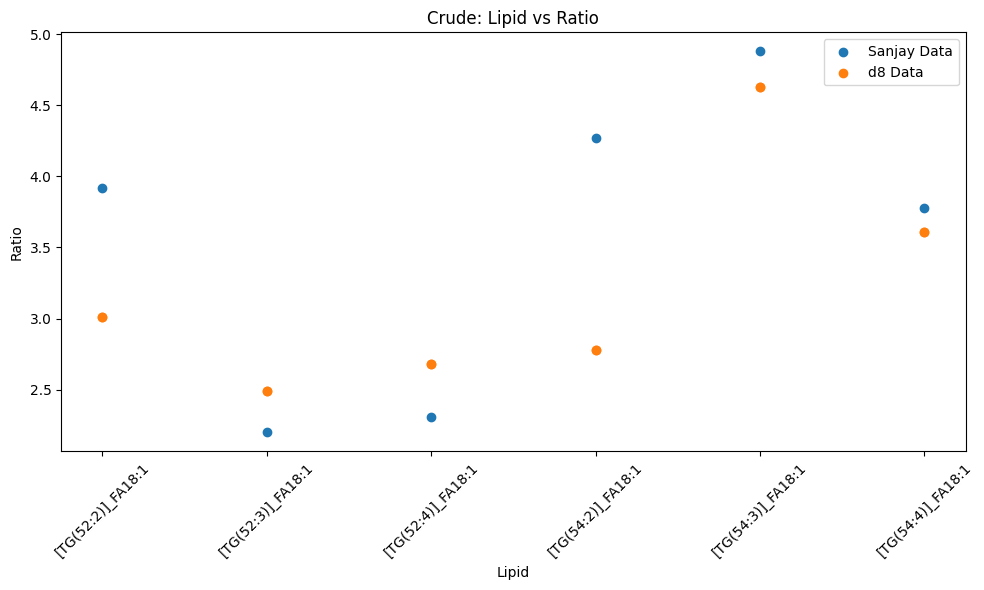

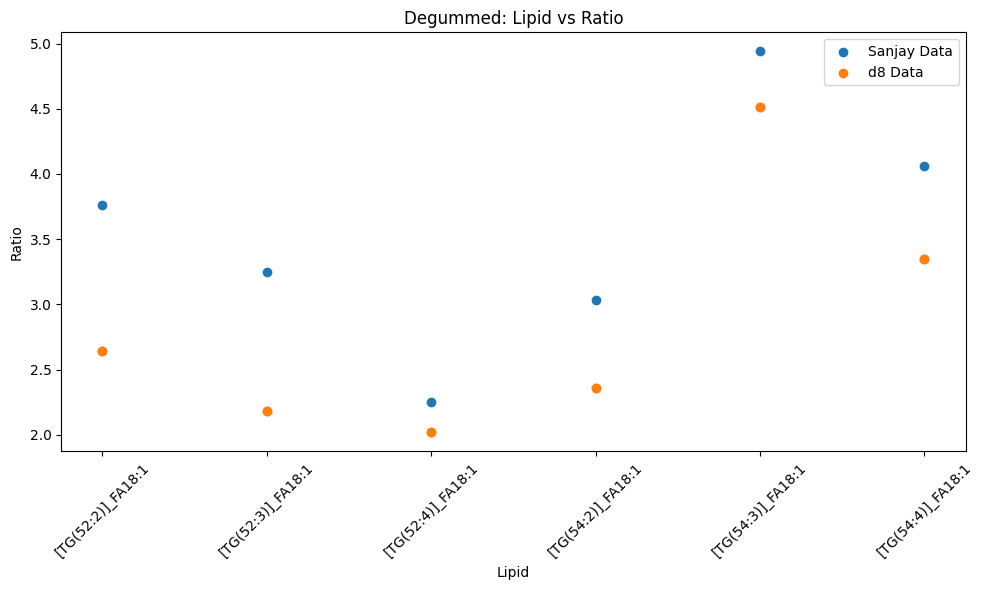

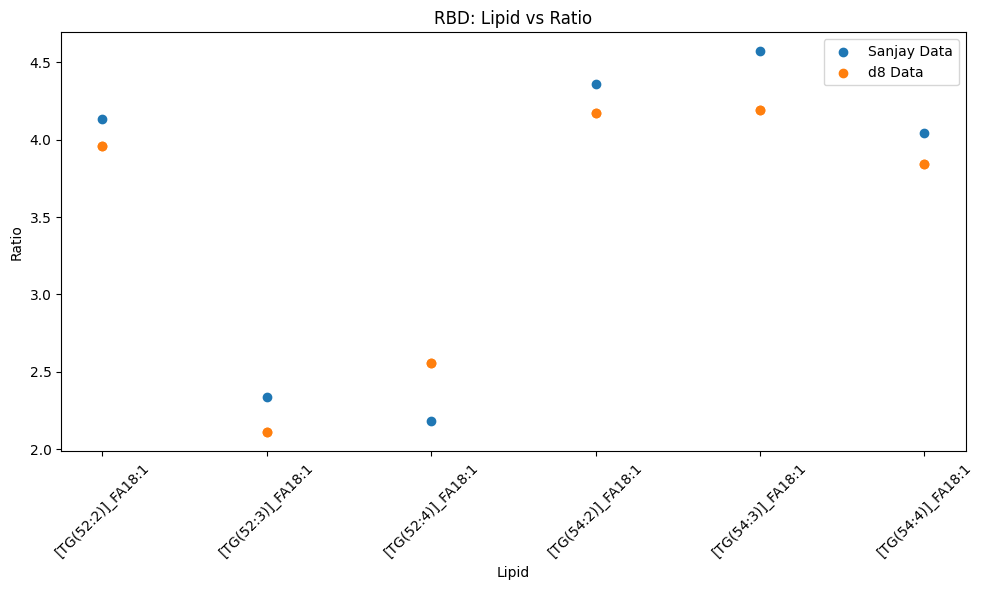

In [ ]:
d9 = d8.copy()
#delete TG(50:3) and TG(52:5) and TG(54:6) and TG 54:5
d9 = d9[~d9['Lipid'].str.contains('TG\(53:0\)')]
d9 = d9[~d9['Lipid'].str.contains('TG\(52:5\)')]
d9 = d9[~d9['Lipid'].str.contains('TG\(54:6\)')]
d9 = d9[~d9['Lipid'].str.contains('TG\(54:5\)')]
sanjay = sanjay[~sanjay['Lipid'].str.contains('TG\(54:5\)')]


# Function to create a combined scatter plot
def create_combined_scatter_plot(df1, df2, x_column_df1, y_column_df1, x_column_df2, y_column_df2, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[x_column_df1], df1[y_column_df1], label='Sanjay Data')
    plt.scatter(df2[x_column_df2], df2[y_column_df2], label='d8 Data')
    plt.xlabel('Lipid')
    plt.ylabel('Ratio')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Filter d8 DataFrame for each category
df_crude_d9 = d9[d9['Purity'] == 'Crude']
df_degummed_d9 = d9[d9['Purity'] == 'Degummed']
df_rbd_d9 = d9[d9['Purity'] == 'RBD']

# Plotting combined scatter plots for Crude, Degummed, and RBD
create_combined_scatter_plot(sanjay, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Lipid', 'Area_Ratio_DDT', 'Crude: Lipid vs Ratio')
create_combined_scatter_plot(sanjay, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Lipid', 'Area_Ratio_DDT', 'Degummed: Lipid vs Ratio')
create_combined_scatter_plot(sanjay, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'Lipid', 'Area_Ratio_DDT', 'RBD: Lipid vs Ratio')


In [ ]:
# d9

# Plot all the areas

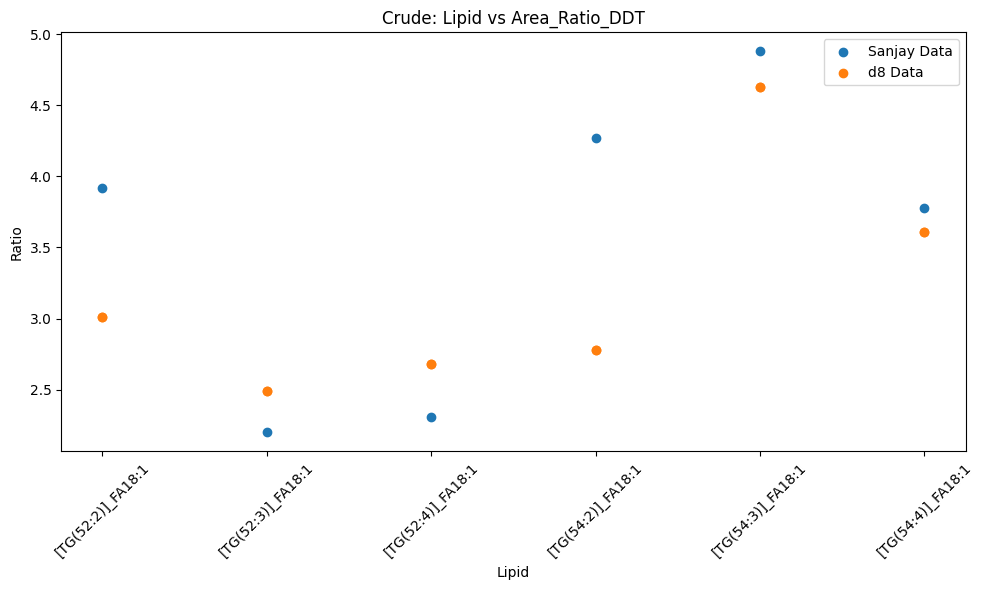

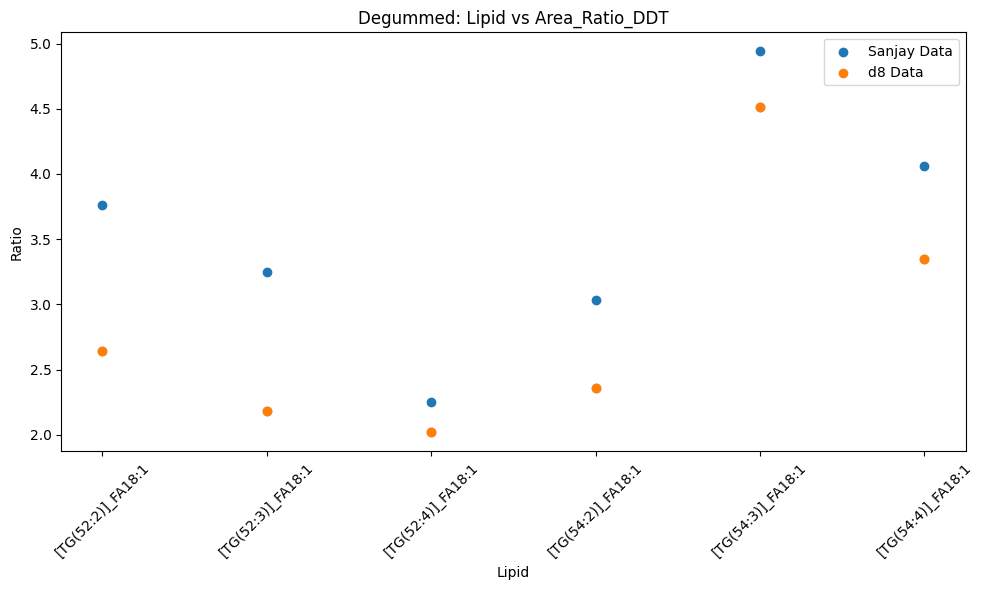

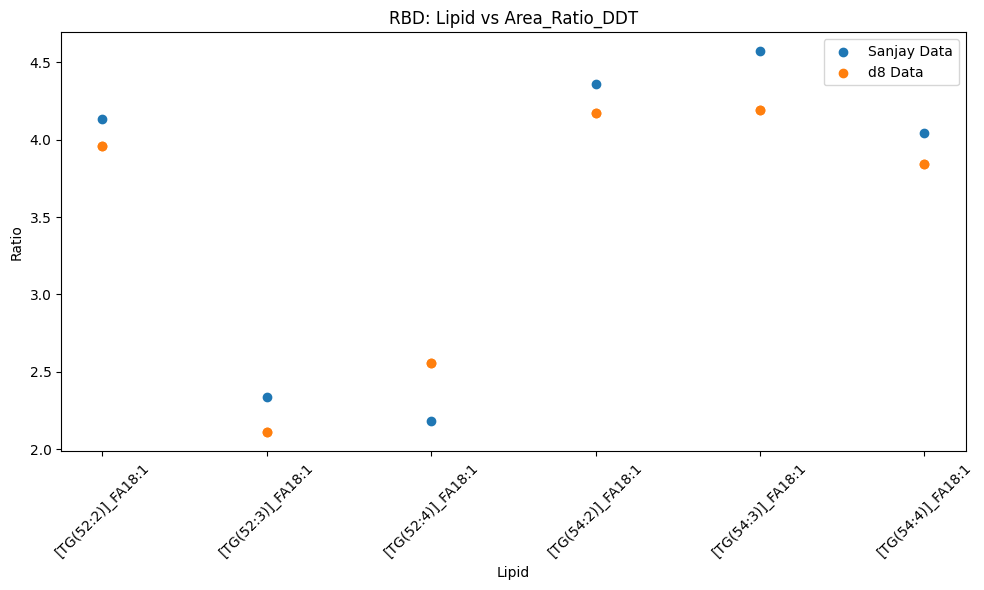

In [ ]:
# Assuming 'd8', 'd9', and 'caitlin' DataFrames are already defined and contain the necessary data

# Function to create a combined scatter plot
def create_combined_scatter_plot(df1, df2, x_column_df1, y_column_df1, x_column_df2, y_column_df2, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(df1[x_column_df1], df1[y_column_df1], label='Sanjay Data')
    plt.scatter(df2[x_column_df2], df2[y_column_df2], label='d8 Data')
    plt.xlabel('Lipid')
    plt.ylabel('Ratio')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Filter d9 DataFrame for each category
df_crude_d9 = d9[d9['Purity'] == 'Crude']
df_degummed_d9 = d9[d9['Purity'] == 'Degummed']
df_rbd_d9 = d9[d9['Purity'] == 'RBD']


# # Column names for the different area ratio columns
# area_ratio_columns = ['Area_Ratio', 'Area_Ratio_DDT', 'Area_HW_Ratio', 'Area_HW_DDT_Ratio']
# Column names for the different area ratio columns
# area_ratio_columns = ['Area_Ratio_DDT', 'Area_HW_DDT_Ratio']
area_ratio_columns = ['Area_Ratio_DDT']

# # Plotting combined scatter plots for each area ratio column and for each purity category
for area_ratio_column in area_ratio_columns:
    create_combined_scatter_plot(sanjay, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Lipid', area_ratio_column, f'Crude: Lipid vs {area_ratio_column}')
    create_combined_scatter_plot(sanjay, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Lipid', area_ratio_column, f'Degummed: Lipid vs {area_ratio_column}')
    create_combined_scatter_plot(sanjay, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'Lipid', area_ratio_column, f'RBD: Lipid vs {area_ratio_column}')


In [ ]:
# # Function to create scatter plots for the 'Crude', 'Degummed', and 'RBD' categories
# def plot_n9n7_values(df1, df2, lipid_column, value_column, title):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df1[lipid_column], df1[value_column], label='Sanjay Data')
#     plt.scatter(df2[lipid_column], df2[value_column], label='Caitlin Data', alpha=0.6)
#     plt.xlabel('Lipid')
#     plt.ylabel(f'{value_column} Ratio')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Now we will plot for each of the 'Crude', 'Degummed', and 'RBD' categories separately.
# plot_n9n7_values(sanjay, caitlin, 'Lipid', 'Crude n-9/n-7', 'Crude n-9/n-7: Lipid vs Ratio')
# plot_n9n7_values(sanjay, caitlin, 'Lipid', 'Degummed n-9/n-7', 'Degummed n-9/n-7: Lipid vs Ratio')
# plot_n9n7_values(sanjay, caitlin, 'Lipid', 'RBD n-9/n-7', 'RBD n-9/n-7: Lipid vs Ratio')

In [ ]:
# # Simulate deletion of certain rows in 'd9' based on 'Lipid' column content
# d9 = d8.copy()
# d9 = d9[~d9['Lipid'].str.contains('52:5')]
# d9 = d9[~d9['Lipid'].str.contains('54:6')]
# d9 = d9[~d9['Lipid'].str.contains('53:0')]

# # Adjusting the plotting function to include 'd9' DataFrame
# def create_combined_scatter_plot(df1, df2, df3, x_column, y_column_df1, y_column_df2, y_column_df3, title):
#     plt.figure(figsize=(10, 6))
#     plt.scatter(df1[x_column], df1[y_column_df1], label='Caitlin Manual', alpha=0.7, marker='p')
#     plt.scatter(df2[x_column], df2[y_column_df2], label='Sanjay Manual', alpha=0.7, marker='s')
#     plt.scatter(df3[x_column], df3[y_column_df3], label='Claw', alpha=0.4)
#     plt.xlabel('Lipid')
#     plt.ylabel('Ratio')
#     plt.title(title)
#     plt.xticks(rotation=45)
#     plt.legend()
#     plt.tight_layout()
#     plt.show()

# # Filter 'd9' DataFrame for each purity category
# df_crude_d9 = d9[d9['Purity'] == 'Crude']
# df_degummed_d9 = d9[d9['Purity'] == 'Degummed']
# df_rbd_d9 = d9[d9['Purity'] == 'RBD']



# # Plotting combined scatter plots for Crude, Degummed, and RBD
# create_combined_scatter_plot(caitlin, sanjay, df_crude_d9, 'Lipid', 'Crude n-9/n-7', 'Crude n-9/n-7', 'Area_Ratio_DDT', 'Crude: Lipid vs Ratio')
# create_combined_scatter_plot(caitlin, sanjay, df_degummed_d9, 'Lipid', 'Degummed n-9/n-7', 'Degummed n-9/n-7', 'Area_Ratio_DDT', 'Degummed: Lipid vs Ratio')
# create_combined_scatter_plot(caitlin, sanjay, df_rbd_d9, 'Lipid', 'RBD n-9/n-7', 'RBD n-9/n-7', 'Area_Ratio_DDT', 'RBD: Lipid vs Ratio')

In [ ]:
def print_lipid_ratios(df1, df2, df3, y_column_df1, y_column_df2, y_column_df3, category):
    print(f"--- {category} Data ---")
    print("Sanjay Data\t\t\tDDT Data\t\t\tDDT_HW Data")
    for lipid in df1['Lipid'].unique():
        value_df1 = df1[df1['Lipid'] == lipid][y_column_df1].iloc[0] if not df1[df1['Lipid'] == lipid].empty else "N/A"
        value_df2 = df2[df2['Lipid'] == lipid][y_column_df2].iloc[0] if not df2[df2['Lipid'] == lipid].empty else "N/A"
        value_df3 = df3[df3['Lipid'] == lipid][y_column_df3].iloc[0] if not df3[df3['Lipid'] == lipid].empty else "N/A"
        print(f"{lipid}: {value_df1}\t\t{lipid}: {value_df2}\t\t{lipid}: {value_df3}")
    print("\n")

# Filter d8 DataFrame for each category
df_crude_d9 = d8[d8['Purity'] == 'Crude']
df_degummed_d9 = d8[d8['Purity'] == 'Degummed']
df_rbd_d9 = d8[d8['Purity'] == 'RBD']

# # Area_Ratio_DDT	Area_Ratio	Area_HW_Ratio	Area_DDT_Ratio	Area_HW_DDT_Ratio
# # Printing Lipid and Ratio values
# print_lipid_ratios(sanjay, df_crude_d9, df_crude_d9, 'Crude n-9/n-7', 'Area_Ratio_DDT','Area_HW_DDT_Ratio', 'Crude')
# print_lipid_ratios(sanjay, df_degummed_d9, df_degummed_d9, 'Degummed n-9/n-7', 'Area_Ratio_DDT','Area_HW_DDT_Ratio', 'Degummed')
# print_lipid_ratios(sanjay, df_rbd_d9, df_rbd_d9, 'RBD n-9/n-7', 'Area_Ratio_DDT','Area_HW_DDT_Ratio', 'RBD')


In [ ]:
def print_lipid_ratios_diff(df1, df2, df3, y_column_df1, y_column_df2, y_column_df3, category):
    print(f"--- {category} Data Differences ---")
    print("Lipid\t\t\tSanjay vs DDT\t\tSanjay vs DDT_HW")
    for lipid in df1['Lipid'].unique():
        value_df1 = df1[df1['Lipid'] == lipid][y_column_df1].iloc[0] if not df1[df1['Lipid'] == lipid].empty else None
        value_df2 = df2[df2['Lipid'] == lipid][y_column_df2].iloc[0] if not df2[df2['Lipid'] == lipid].empty else None
        value_df3 = df3[df3['Lipid'] == lipid][y_column_df3].iloc[0] if not df3[df3['Lipid'] == lipid].empty else None
        
        diff_ddt = "N/A" if value_df1 is None or value_df2 is None else abs(round(value_df1 - value_df2, 2))
        diff_ddt_hw = "N/A" if value_df1 is None or value_df3 is None else abs(round(value_df1 - value_df3, 2))
        
        print(f"{lipid}\t\t{diff_ddt}\t\t\t{diff_ddt_hw}")
    print("\n")

# Filter d8 DataFrame for each category
df_crude_d8 = d8[d8['Purity'] == 'Crude']
df_degummed_d8 = d8[d8['Purity'] == 'Degummed']
df_rbd_d8 = d8[d8['Purity'] == 'RBD']

# # Printing Lipid and Ratio differences
# print_lipid_ratios_diff(sanjay, df_crude_d8, df_crude_d8, 'Crude n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Crude')
# print_lipid_ratios_diff(sanjay, df_degummed_d8, df_degummed_d8, 'Degummed n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Degummed')
# print_lipid_ratios_diff(sanjay, df_rbd_d8, df_rbd_d8, 'RBD n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'RBD')



In [ ]:
def create_compare_df_with_purity(df1, df2, df3, y_column_df1, y_column_df2, y_column_df3, purity_category):
    compare_data = []

    for lipid in df1['Lipid'].unique():
        value_df1 = df1[df1['Lipid'] == lipid][y_column_df1].iloc[0] if not df1[df1['Lipid'] == lipid].empty else None
        value_df2 = df2[df2['Lipid'] == lipid][y_column_df2].iloc[0] if not df2[df2['Lipid'] == lipid].empty else None
        value_df3 = df3[df3['Lipid'] == lipid][y_column_df3].iloc[0] if not df3[df3['Lipid'] == lipid].empty else None

        diff_ddt = None if value_df1 is None or value_df2 is None else abs(value_df1 - value_df2)
        diff_ddt_hw = None if value_df1 is None or value_df3 is None else abs(value_df1 - value_df3)

        compare_data.append({'Lipid': lipid, 'Purity': purity_category, 'Sanjay_vs_DDT': diff_ddt, 'Sanjay_vs_DDT_HW': diff_ddt_hw})

    compare_df = pd.DataFrame(compare_data)
    return compare_df

# Create DataFrames to compare differences, including Purity category
compare_crude = create_compare_df_with_purity(sanjay, df_crude_d8, df_crude_d8, 'Crude n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Crude')
compare_degummed = create_compare_df_with_purity(sanjay, df_degummed_d8, df_degummed_d8, 'Degummed n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'Degummed')
compare_rbd = create_compare_df_with_purity(sanjay, df_rbd_d8, df_rbd_d8, 'RBD n-9/n-7', 'Area_Ratio_DDT', 'Area_HW_DDT_Ratio', 'RBD')

# Concatenate the different purity category DataFrames
compare_df = pd.concat([compare_crude, compare_degummed, compare_rbd])

# # Display the combined DataFrame
# compare_df


In [ ]:
def calculate_std_dev_across_purities_for_column(df, column_name):
    """
    Calculate the standard deviation across different purity categories for each Lipid.
    """
    # Group by Lipid and aggregate the column into a list
    grouped = df.groupby('Lipid')[column_name].apply(list)

    # Calculate the standard deviation for each group, handling non-numeric values
    std_dev = grouped.apply(lambda x: np.std([y for y in x if isinstance(y, (int, float)) and y is not None]))

    return std_dev

# Assuming the 'compare_df' DataFrame has been created and contains 'Lipid', 'Sanjay_vs_DDT', 'Sanjay_vs_DDT_HW' columns

# Calculate standard deviation across purities for 'Sanjay_vs_DDT'
std_dev_sanjay_vs_ddt = calculate_std_dev_across_purities_for_column(compare_df, 'Sanjay_vs_DDT')
#round to 2 decimal places
std_dev_sanjay_vs_ddt = std_dev_sanjay_vs_ddt.round(2)


# Calculate standard deviation across purities for 'Sanjay_vs_DDT_HW'
std_dev_sanjay_vs_ddt_hw = calculate_std_dev_across_purities_for_column(compare_df, 'Sanjay_vs_DDT_HW')
#round to 2 decimal places
std_dev_sanjay_vs_ddt_hw = std_dev_sanjay_vs_ddt_hw.round(2)

# Create new columns for standard deviation in 'compare_df'
compare_df['Std Dev Sanjay_vs_DDT'] = compare_df['Lipid'].map(std_dev_sanjay_vs_ddt)
compare_df['Std Dev Sanjay_vs_DDT_HW'] = compare_df['Lipid'].map(std_dev_sanjay_vs_ddt_hw)

def calculate_avg_std_dev_for_each(df, std_dev_columns):
    """
    Calculate the average of standard deviations for each specified column and add as a new column.
    """
    for col in std_dev_columns:
        avg_col_name = f'Avg Std Dev {col}'
        df[avg_col_name] = df[col].mean()
    return df

# Assuming the 'compare_df' DataFrame has been updated with 'Std Dev Sanjay_vs_DDT' and 'Std Dev Sanjay_vs_DDT_HW'

# Calculate the average of standard deviations for 'Std Dev Sanjay_vs_DDT' and 'Std Dev Sanjay_vs_DDT_HW'
compare_df = calculate_avg_std_dev_for_each(compare_df, ['Std Dev Sanjay_vs_DDT', 'Std Dev Sanjay_vs_DDT_HW'])
#round to 2 decimal places
compare_df = compare_df.round(2)

# Calculate the average of standard deviations for 'Std Dev Sanjay_vs_DDT' and 'Std Dev Sanjay_vs_DDT_HW'
avg_std_dev_ddt = compare_df['Std Dev Sanjay_vs_DDT'].mean().round(2)
avg_std_dev_ddt_hw = compare_df['Std Dev Sanjay_vs_DDT_HW'].mean().round(2)

# Print the average standard deviations to the terminal
print(f"Average Standard Deviation for Sanjay_vs_DDT: {avg_std_dev_ddt}")
print(f"Average Standard Deviation for Sanjay_vs_DDT_HW: {avg_std_dev_ddt_hw}")



# # Display the updated DataFrame with the new average standard deviation columns
# compare_df






Average Standard Deviation for Sanjay_vs_DDT: 0.29
Average Standard Deviation for Sanjay_vs_DDT_HW: 0.47


In [ ]:
import pandas as pd
import numpy as np

def calculate_std_dev(df, column_name):
    """
    Calculate the standard deviation of the specified column across different purity categories for each Lipid.
    """
    # Group by Lipid and aggregate the column into a list
    grouped = df.groupby('Lipid')[column_name].apply(list)

    # Calculate the standard deviation for each group, handling non-numeric values
    std_dev = grouped.apply(lambda x: np.std([y for y in x if isinstance(y, (int, float)) and y is not None]))

    return std_dev
# Assuming 'Area_Ratio_DDT' is the column you are interested in for d8, and 'Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7' for Caitlin
# Combine the different purity dataframes into one for d8
d8_combined = pd.concat([df_crude_d9, df_degummed_d9, df_rbd_d9])
d8_combined = d8_combined[~d8_combined['Lipid'].str.contains('TG\(53:0\)')]
d8_combined = d8_combined[~d8_combined['Lipid'].str.contains('TG\(52:5\)')]
d8_combined = d8_combined[~d8_combined['Lipid'].str.contains('TG\(54:6\)')]

# For Caitlin, ensure the data is structured so that each Lipid has a row for each purity type with the corresponding ratio
# If not, you might need to reshape the data accordingly

# Calculate standard deviation for each Lipid in d8
std_dev_d8 = calculate_std_dev(d8_combined, 'Area_Ratio_DDT')
std_dev_d8_HW = calculate_std_dev(d8_combined, 'Area_HW_DDT_Ratio')
print("Standard Deviation for d8:")
print(std_dev_d8)
print("Standard Deviation for d8_HW:")
print(std_dev_d8_HW)

# Function to calculate standard deviation for each Lipid in 'sanjay'
def calculate_std_dev_for_lipid(row):
    ratios = [row[col] for col in ['Crude n-9/n-7', 'Degummed n-9/n-7', 'RBD n-9/n-7'] if isinstance(row[col], (int, float))]
    return np.std(ratios)

# Apply the function to each row in the Caitlin DataFrame
sanjay['Std Dev'] = sanjay.apply(calculate_std_dev_for_lipid, axis=1)

# print(sanjay[['Lipid', 'Std Dev']])

Standard Deviation for d8:
Lipid
[TG(52:2)]_FA18:1    0.555958
[TG(52:3)]_FA18:1    0.165126
[TG(52:4)]_FA18:1    0.287054
[TG(54:2)]_FA18:1    0.773491
[TG(54:3)]_FA18:1    0.185712
[TG(54:4)]_FA18:1    0.200167
[TG(54:5)]_FA18:1    1.059570
Name: Area_Ratio_DDT, dtype: float64
Standard Deviation for d8_HW:
Lipid
[TG(52:2)]_FA18:1    0.608331
[TG(52:3)]_FA18:1    0.249132
[TG(52:4)]_FA18:1    0.750392
[TG(54:2)]_FA18:1    0.183848
[TG(54:3)]_FA18:1    1.018048
[TG(54:4)]_FA18:1    0.415157
[TG(54:5)]_FA18:1    0.421927
Name: Area_HW_DDT_Ratio, dtype: float64


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
# Calculating the average standard deviation for each DataFrame
avg_std_dev_d8 = std_dev_d8.mean().round(2)
avg_std_dev_sanjay = sanjay['Std Dev'].mean().round(2)
avg_std_dev_d8_HW = std_dev_d8_HW.mean().round(2)

# Print the average standard deviations to the terminal
print(f"Average Differance Standard Deviation for Sanjay_vs_DDT: {avg_std_dev_ddt}")
print(f"Average Differance Standard Deviation for Sanjay_vs_DDT_HW: {avg_std_dev_ddt_hw}")
print('____')
print(f"CLAW Across Purities Std Dev={avg_std_dev_d8}\n"
      f"HW Across Purities Std Dev={avg_std_dev_d8_HW}\n"
      f"Manual Across Purities Std Dev={avg_std_dev_sanjay}")





Average Differance Standard Deviation for Sanjay_vs_DDT: 0.29
Average Differance Standard Deviation for Sanjay_vs_DDT_HW: 0.47
____
CLAW Across Purities Std Dev=0.46
HW Across Purities Std Dev=0.52
Manual Across Purities Std Dev=0.26
